In [131]:
import pandas as pd
import numpy as np
import warnings
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.special import jn
from IPython.display import display, clear_output
import time

warnings.filterwarnings('ignore')

#模型预测
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor

#降维
from sklearn.decomposition import PCA,FastICA,FactorAnalysis,SparsePCA

import lightgbm as lgb
import xgboost as xgb

#评价
from sklearn.model_selection import GridSearchCV,cross_val_score,StratifiedKFold,train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [132]:
path = 'D:/data analysis/天池-二手车/'
train_data = pd.read_csv(path+'used_car_train_20200313.csv',sep=' ')
test_data = pd.read_csv(path+'used_car_testB_20200421.csv',sep= ' ')

In [133]:
print(train_data.shape)
print(test_data.shape)

(150000, 31)
(50000, 30)


In [134]:
train_data.head()

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
0,0,736,20040402,30.0,6,1.0,0.0,0.0,60,12.5,...,0.235676,0.101988,0.129549,0.022816,0.097462,-2.881803,2.804097,-2.420821,0.795292,0.914762
1,1,2262,20030301,40.0,1,2.0,0.0,0.0,0,15.0,...,0.264777,0.121004,0.135731,0.026597,0.020582,-4.900482,2.096338,-1.030483,-1.722674,0.245522
2,2,14874,20040403,115.0,15,1.0,0.0,0.0,163,12.5,...,0.251410,0.114912,0.165147,0.062173,0.027075,-4.846749,1.803559,1.565330,-0.832687,-0.229963
3,3,71865,19960908,109.0,10,0.0,0.0,1.0,193,15.0,...,0.274293,0.110300,0.121964,0.033395,0.000000,-4.509599,1.285940,-0.501868,-2.438353,-0.478699
4,4,111080,20120103,110.0,5,1.0,0.0,0.0,68,5.0,...,0.228036,0.073205,0.091880,0.078819,0.121534,-1.896240,0.910783,0.931110,2.834518,1.923482


In [135]:
train_data.tail()

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
149995,149995,163978,20000607,121.0,10,4.0,0.0,1.0,163,15.0,...,0.280264,0.000310,0.048441,0.071158,0.019174,1.988114,-2.983973,0.589167,-1.304370,-0.302592
149996,149996,184535,20091102,116.0,11,0.0,0.0,0.0,125,10.0,...,0.253217,0.000777,0.084079,0.099681,0.079371,1.839166,-2.774615,2.553994,0.924196,-0.272160
149997,149997,147587,20101003,60.0,11,1.0,1.0,0.0,90,6.0,...,0.233353,0.000705,0.118872,0.100118,0.097914,2.439812,-1.630677,2.290197,1.891922,0.414931
149998,149998,45907,20060312,34.0,10,3.0,1.0,0.0,156,15.0,...,0.256369,0.000252,0.081479,0.083558,0.081498,2.075380,-2.633719,1.414937,0.431981,-1.659014
149999,149999,177672,19990204,19.0,28,6.0,0.0,1.0,193,12.5,...,0.284475,0.000000,0.040072,0.062543,0.025819,1.978453,-3.179913,0.031724,-1.483350,-0.342674


In [12]:
train_data.describe()

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
count,150000.000000,150000.000000,1.500000e+05,149999.000000,150000.000000,145494.000000,141320.000000,144019.000000,150000.000000,150000.000000,...,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000
mean,74999.500000,68349.172873,2.003417e+07,47.129021,8.052733,1.792369,0.375842,0.224943,119.316547,12.597160,...,0.248204,0.044923,0.124692,0.058144,0.061996,-0.001000,0.009035,0.004813,0.000313,-0.000688
std,43301.414527,61103.875095,5.364988e+04,49.536040,7.864956,1.760640,0.548677,0.417546,177.168419,3.919576,...,0.045804,0.051743,0.201410,0.029186,0.035692,3.772386,3.286071,2.517478,1.288988,1.038685
min,0.000000,0.000000,1.991000e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,-9.168192,-5.558207,-9.639552,-4.153899,-6.546556
25%,37499.750000,11156.000000,1.999091e+07,10.000000,1.000000,0.000000,0.000000,0.000000,75.000000,12.500000,...,0.243615,0.000038,0.062474,0.035334,0.033930,-3.722303,-1.951543,-1.871846,-1.057789,-0.437034
50%,74999.500000,51638.000000,2.003091e+07,30.000000,6.000000,1.000000,0.000000,0.000000,110.000000,15.000000,...,0.257798,0.000812,0.095866,0.057014,0.058484,1.624076,-0.358053,-0.130753,-0.036245,0.141246
75%,112499.250000,118841.250000,2.007111e+07,66.000000,13.000000,3.000000,1.000000,0.000000,150.000000,15.000000,...,0.265297,0.102009,0.125243,0.079382,0.087491,2.844357,1.255022,1.776933,0.942813,0.680378
max,149999.000000,196812.000000,2.015121e+07,247.000000,39.000000,7.000000,6.000000,1.000000,19312.000000,15.000000,...,0.291838,0.151420,1.404936,0.160791,0.222787,12.357011,18.819042,13.847792,11.147669,8.658418


In [13]:
test_data.describe()

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
count,50000.000000,50000.000000,5.000000e+04,50000.00000,50000.000000,48496.000000,47076.000000,48032.000000,50000.000000,50000.000000,...,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,224999.500000,68505.606100,2.003401e+07,47.64948,8.087140,1.793736,0.376498,0.226953,119.766960,12.598260,...,0.248147,0.044624,0.124693,0.058198,0.062113,0.019633,0.002759,0.004342,0.004570,-0.007209
std,14433.901067,61032.124271,5.351615e+04,49.90741,7.899648,1.764970,0.549281,0.418866,206.313348,3.912519,...,0.045836,0.051664,0.201440,0.029171,0.035723,3.764095,3.289523,2.515912,1.287194,1.044718
min,200000.000000,1.000000,1.991000e+07,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,-9.119719,-5.662163,-8.291868,-4.157649,-6.098192
25%,212499.750000,11315.000000,1.999100e+07,11.00000,1.000000,0.000000,0.000000,0.000000,75.000000,12.500000,...,0.243436,0.000035,0.062519,0.035413,0.033880,-3.675196,-1.963928,-1.865406,-1.048722,-0.440706
50%,224999.500000,52215.000000,2.003091e+07,30.00000,6.000000,1.000000,0.000000,0.000000,110.000000,15.000000,...,0.257818,0.000801,0.095880,0.056804,0.058749,1.632134,-0.375537,-0.138943,-0.036352,0.136849
75%,237499.250000,118710.750000,2.007110e+07,66.00000,13.000000,3.000000,1.000000,0.000000,150.000000,15.000000,...,0.265263,0.101654,0.125470,0.079387,0.087624,2.846205,1.263451,1.775632,0.945239,0.685555
max,249999.000000,196808.000000,2.015121e+07,246.00000,39.000000,7.000000,6.000000,1.000000,19211.000000,15.000000,...,0.291176,0.153403,1.411559,0.157458,0.211304,12.177864,18.789496,13.384828,5.635374,2.649768


In [14]:
#如果训练集和测试集分布差别很大，可以通过采样的方式来构造出一种比较相似的分布。有助于进一步操作

In [16]:
numerical_cols = train_data.select_dtypes(exclude='object').columns
print(numerical_cols)

Index(['SaleID', 'name', 'regDate', 'model', 'brand', 'bodyType', 'fuelType',
       'gearbox', 'power', 'kilometer', 'regionCode', 'seller', 'offerType',
       'creatDate', 'price', 'v_0', 'v_1', 'v_2', 'v_3', 'v_4', 'v_5', 'v_6',
       'v_7', 'v_8', 'v_9', 'v_10', 'v_11', 'v_12', 'v_13', 'v_14'],
      dtype='object')


In [17]:
categorical_cols = train_data.select_dtypes(include='object').columns
print(categorical_cols)

Index(['notRepairedDamage'], dtype='object')


In [19]:
feature_cols = [col for col in numerical_cols if col not in ['SaleID', 'name', 'regDate', 'model', 'brand','regionCode','creatDate','seller','price']]

In [21]:
feature_cols

['bodyType',
 'fuelType',
 'gearbox',
 'power',
 'kilometer',
 'offerType',
 'v_0',
 'v_1',
 'v_2',
 'v_3',
 'v_4',
 'v_5',
 'v_6',
 'v_7',
 'v_8',
 'v_9',
 'v_10',
 'v_11',
 'v_12',
 'v_13',
 'v_14']

In [22]:
feature_cols = [col for col in feature_cols if 'Type' not in col]
feature_cols

['gearbox',
 'power',
 'kilometer',
 'v_0',
 'v_1',
 'v_2',
 'v_3',
 'v_4',
 'v_5',
 'v_6',
 'v_7',
 'v_8',
 'v_9',
 'v_10',
 'v_11',
 'v_12',
 'v_13',
 'v_14']

In [23]:
X_data = train_data[feature_cols]
Y_data = train_data['price']

X_test = test_data[feature_cols]

In [26]:
print(X_data.shape)
print(X_test.shape)

(150000, 18)
(50000, 18)


In [29]:
def Sta_inf(data):
    print('_min',np.min(data))
    print('_max:',np.max(data))
    print('_mean',np.mean(data))
    print('_ptp',np.ptp(data))
    print('_std',np.std(data))
    print('_var',np.var(data))

In [30]:
Sta_inf(Y_data)

_min 11
_max: 99999
_mean 5923.327333333334
_ptp 99988
_std 7501.973469876438
_var 56279605.94272992


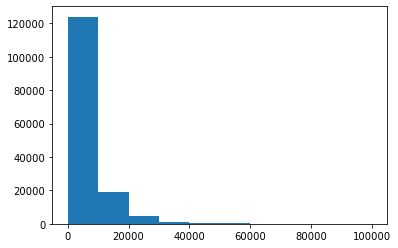

In [32]:
plt.hist(Y_data)
plt.show()
plt.close()

In [33]:
X_data = X_data.fillna(-1)
X_test = X_test.fillna(-1)

In [34]:
sk = StratifiedKFold(n_splits=5,shuffle=True,random_state=0)

In [45]:
Y_data.values

array([1850, 3600, 6222, ..., 7500, 4999, 4700], dtype=int64)

In [43]:
for train1,valid1 in sk.split(X_data,Y_data):
    print(train1)
    print(valid1)
    print(train1.shape)
    print(valid1.shape)
    print(X_data.iloc[train1])
    print(X_data.iloc[train1].values)
    break

[     0      1      2 ... 149996 149997 149999]
[    12     17     22 ... 149987 149991 149998]
(120000,)
(30000,)
        gearbox  power  kilometer        v_0       v_1       v_2       v_3  \
0           0.0     60       12.5  43.357796  3.966344  0.050257  2.159744   
1           0.0      0       15.0  45.305273  5.236112  0.137925  1.380657   
2           0.0    163       12.5  45.978359  4.823792  1.319524 -0.998467   
3           1.0    193       15.0  45.687478  4.492574 -0.050616  0.883600   
4           0.0     68        5.0  44.383511  2.031433  0.572169 -1.571239   
...         ...    ...        ...        ...       ...       ...       ...   
149994      0.0    122        3.0  47.055121  4.733281  1.851484 -1.885076   
149995      1.0    163       15.0  45.316543 -3.139095 -1.269707 -0.736609   
149996      0.0    125       10.0  45.972058 -3.143764 -0.023523 -2.366699   
149997      0.0     90        6.0  44.733481 -3.105721  0.595454 -2.279091   
149999      1.0    193     

In [47]:
xgr = xgb.XGBRegressor(n_estimators=120,learning_rate=0.1,gamma=0,subsample=0.8,colsample_bytree=0.9,max_depth=7)
scores_train = []
scores = []

sk = StratifiedKFold(n_splits=5,shuffle=True,random_state=0)
for train_ind,val_ind in sk.split(X_data,Y_data):
    train_x = X_data.iloc[train_ind].values
    train_y = Y_data.iloc[train_ind]
    val_x = X_data.iloc[val_ind].values
    val_y = Y_data.iloc[val_ind]
    
    xgr.fit(train_x,train_y)
    pred_train_xgb = xgr.predict(train_x)
    pred_xgb = xgr.predict(val_x)
    
    score_train = mean_absolute_error(train_y,pred_train_xgb)
    scores_train.append(score_train)
    score = mean_absolute_error(val_y,pred_xgb)
    scores.append(score)
    
print('train mae:',np.mean(scores_train))
print('val mae:',np.mean(scores))

train mae: 622.2432648243176
val mae: 714.0856746034109


In [52]:
def build_model_xgb(x_train,y_train):
    model = xgb.XGBRegressor(n_estimators=150,learning_rate=0.1,gamma=0,subsample=0.8,colsample_bytree=0.9,max_depth=7)
    model.fit(x_train,y_train)
    return model

def build_model_lgb(x_train,y_train):
    estimator = lgb.LGBMRegressor(num_leaves=127,n_estimators=150)
    param_grid={
        'learning_rate':[0.01,0.05,0.1,0.2],
    }
    gbm = GridSearchCV(estimator,param_grid)
    gbm.fit(x_train,y_train)
    return gbm

In [53]:
x_train,x_val,y_train,y_val = train_test_split(X_data,Y_data,test_size=0.3)

In [54]:
print('Train lgb...')
model_lgb = build_model_lgb(x_train,y_train)
val_lgb = model_lgb.predict(x_val)
MAE_lgb = mean_absolute_error(y_val,val_lgb)
print('MAE of val with lgb:',MAE_lgb)

print('Predict lgb...')
model_lgb_pre = build_model_lgb(X_data,Y_data)
sub_lgb = model_lgb_pre.predict(X_test)

print('Sta of Predict lgb:')
Sta_inf(sub_lgb)

Train lgb...
MAE of val with lgb: 688.6392756694931
Predict lgb...
Sta of Predict lgb:
_min -589.8793550785414
_max: 90760.26063584947
_mean 5906.935218383807
_ptp 91350.13999092802
_std 7344.644970956768
_var 53943809.749400534


In [55]:
print('Train xgb...')
model_xgb = build_model_xgb(x_train,y_train)
val_xgb = model_xgb.predict(x_val)
MAE_xgb = mean_absolute_error(y_val,val_xgb)
print('MAE of val with xgb:',MAE_xgb)

print('Predict xgb...')
model_xgb_pre = build_model_xgb(X_data,Y_data)
sub_xgb = model_xgb_pre.predict(X_test)
print('Sta of Predict xgb:')
Sta_inf(sub_xgb)

Train xgb...
MAE of val with xgb: 714.3478164370298
Predict xgb...
Sta of Predict xgb:
_min -318.20892
_max: 90140.625
_mean 5910.7607
_ptp 90458.836
_std 7345.965
_var 53963196.0


In [56]:
val_Weighted = (1-MAE_lgb/(MAE_xgb+MAE_lgb))*val_lgb+(1-MAE_xgb/(MAE_xgb+MAE_lgb))*val_xgb
val_Weighted

array([3469.42206612, 1818.97140488, 2757.0950793 , ..., 2936.82806904,
       3256.41022644, 6511.08994238])

In [57]:
val_Weighted[val_Weighted<0]=10

In [58]:
print('MAE of val with Weighted ensemble:',mean_absolute_error(y_val,val_Weighted))

MAE of val with Weighted ensemble: 686.8153992662935


In [59]:
sub_Weighted=(1-MAE_lgb/(MAE_xgb+MAE_lgb))*sub_lgb+(1-MAE_xgb/(MAE_xgb+MAE_lgb))*sub_xgb

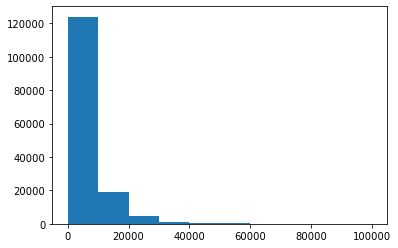

In [60]:
plt.hist(Y_data)
plt.show()

In [61]:
sub = pd.DataFrame()
sub['SaleID'] = test_data.SaleID
sub['price'] = sub_Weighted

In [62]:
sub.head()

,SaleID,price
0,200000,1177.393900
1,200001,1806.619881
2,200002,8560.450333
3,200003,1346.424267
4,200004,2074.384881


# 2. EDA

In [65]:
import missingno as msno

In [83]:
path = 'D:/data analysis/天池-二手车/'
train_data = pd.read_csv(path+'used_car_train_20200313.csv',sep=' ')
test_data = pd.read_csv(path+'used_car_testB_20200421.csv',sep= ' ')

In [84]:
train_data.head().append(train_data.tail())

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
0,0,736,20040402,30.0,6,1.0,0.0,0.0,60,12.5,...,0.235676,0.101988,0.129549,0.022816,0.097462,-2.881803,2.804097,-2.420821,0.795292,0.914762
1,1,2262,20030301,40.0,1,2.0,0.0,0.0,0,15.0,...,0.264777,0.121004,0.135731,0.026597,0.020582,-4.900482,2.096338,-1.030483,-1.722674,0.245522
2,2,14874,20040403,115.0,15,1.0,0.0,0.0,163,12.5,...,0.251410,0.114912,0.165147,0.062173,0.027075,-4.846749,1.803559,1.565330,-0.832687,-0.229963
3,3,71865,19960908,109.0,10,0.0,0.0,1.0,193,15.0,...,0.274293,0.110300,0.121964,0.033395,0.000000,-4.509599,1.285940,-0.501868,-2.438353,-0.478699
4,4,111080,20120103,110.0,5,1.0,0.0,0.0,68,5.0,...,0.228036,0.073205,0.091880,0.078819,0.121534,-1.896240,0.910783,0.931110,2.834518,1.923482
149995,149995,163978,20000607,121.0,10,4.0,0.0,1.0,163,15.0,...,0.280264,0.000310,0.048441,0.071158,0.019174,1.988114,-2.983973,0.589167,-1.304370,-0.302592
149996,149996,184535,20091102,116.0,11,0.0,0.0,0.0,125,10.0,...,0.253217,0.000777,0.084079,0.099681,0.079371,1.839166,-2.774615,2.553994,0.924196,-0.272160
149997,149997,147587,20101003,60.0,11,1.0,1.0,0.0,90,6.0,...,0.233353,0.000705,0.118872,0.100118,0.097914,2.439812,-1.630677,2.290197,1.891922,0.414931
149998,149998,45907,20060312,34.0,10,3.0,1.0,0.0,156,15.0,...,0.256369,0.000252,0.081479,0.083558,0.081498,2.075380,-2.633719,1.414937,0.431981,-1.659014
149999,149999,177672,19990204,19.0,28,6.0,0.0,1.0,193,12.5,...,0.284475,0.000000,0.040072,0.062543,0.025819,1.978453,-3.179913,0.031724,-1.483350,-0.342674


In [85]:
test_data.head().append(test_data.tail())

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
0,200000,133777,20000501,67.0,0,1.0,0.0,0.0,101,15.0,...,0.236520,0.000241,0.105319,0.046233,0.094522,3.619512,-0.280607,-2.019761,0.978828,0.803322
1,200001,61206,19950211,19.0,6,2.0,0.0,0.0,73,6.0,...,0.261518,0.000000,0.120323,0.046784,0.035385,2.997376,-1.406705,-1.020884,-1.349990,-0.200542
2,200002,67829,20090606,5.0,5,4.0,0.0,0.0,120,5.0,...,0.261691,0.090836,0.000000,0.079655,0.073586,-3.951084,-0.433467,0.918964,1.634604,1.027173
3,200003,8892,20020601,22.0,9,1.0,0.0,0.0,58,15.0,...,0.236050,0.101777,0.098950,0.026830,0.096614,-2.846788,2.800267,-2.524610,1.076819,0.461610
4,200004,76998,20030301,46.0,6,0.0,NaN,0.0,116,15.0,...,0.257000,0.000000,0.066732,0.057771,0.068852,2.839010,-1.659801,-0.924142,0.199423,0.451014
49995,249995,111443,20041005,4.0,4,0.0,NaN,1.0,150,15.0,...,0.263668,0.000292,0.141804,0.076393,0.039272,2.072901,-2.531869,1.716978,-1.063437,0.326587
49996,249996,152834,20130409,65.0,1,0.0,0.0,0.0,179,4.0,...,0.255310,0.000991,0.155868,0.108425,0.067841,1.358504,-3.290295,4.269809,0.140524,0.556221
49997,249997,132531,20041211,4.0,4,0.0,0.0,1.0,147,12.5,...,0.262933,0.000318,0.141872,0.071968,0.042966,2.165658,-2.417885,1.370612,-1.073133,0.270602
49998,249998,143405,20020702,40.0,1,4.0,0.0,1.0,176,15.0,...,0.282106,0.000023,0.067483,0.067526,0.009006,2.030114,-2.939244,0.569078,-1.718245,0.316379
49999,249999,78202,20090708,32.0,8,1.0,0.0,0.0,0,3.0,...,0.231449,0.103947,0.096027,0.062328,0.110180,-3.689090,2.032376,0.109157,2.202828,0.847469


In [86]:
train_data.describe()

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
count,150000.000000,150000.000000,1.500000e+05,149999.000000,150000.000000,145494.000000,141320.000000,144019.000000,150000.000000,150000.000000,...,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000
mean,74999.500000,68349.172873,2.003417e+07,47.129021,8.052733,1.792369,0.375842,0.224943,119.316547,12.597160,...,0.248204,0.044923,0.124692,0.058144,0.061996,-0.001000,0.009035,0.004813,0.000313,-0.000688
std,43301.414527,61103.875095,5.364988e+04,49.536040,7.864956,1.760640,0.548677,0.417546,177.168419,3.919576,...,0.045804,0.051743,0.201410,0.029186,0.035692,3.772386,3.286071,2.517478,1.288988,1.038685
min,0.000000,0.000000,1.991000e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,-9.168192,-5.558207,-9.639552,-4.153899,-6.546556
25%,37499.750000,11156.000000,1.999091e+07,10.000000,1.000000,0.000000,0.000000,0.000000,75.000000,12.500000,...,0.243615,0.000038,0.062474,0.035334,0.033930,-3.722303,-1.951543,-1.871846,-1.057789,-0.437034
50%,74999.500000,51638.000000,2.003091e+07,30.000000,6.000000,1.000000,0.000000,0.000000,110.000000,15.000000,...,0.257798,0.000812,0.095866,0.057014,0.058484,1.624076,-0.358053,-0.130753,-0.036245,0.141246
75%,112499.250000,118841.250000,2.007111e+07,66.000000,13.000000,3.000000,1.000000,0.000000,150.000000,15.000000,...,0.265297,0.102009,0.125243,0.079382,0.087491,2.844357,1.255022,1.776933,0.942813,0.680378
max,149999.000000,196812.000000,2.015121e+07,247.000000,39.000000,7.000000,6.000000,1.000000,19312.000000,15.000000,...,0.291838,0.151420,1.404936,0.160791,0.222787,12.357011,18.819042,13.847792,11.147669,8.658418


In [87]:
test_data.describe()

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
count,50000.000000,50000.000000,5.000000e+04,50000.00000,50000.000000,48496.000000,47076.000000,48032.000000,50000.000000,50000.000000,...,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,224999.500000,68505.606100,2.003401e+07,47.64948,8.087140,1.793736,0.376498,0.226953,119.766960,12.598260,...,0.248147,0.044624,0.124693,0.058198,0.062113,0.019633,0.002759,0.004342,0.004570,-0.007209
std,14433.901067,61032.124271,5.351615e+04,49.90741,7.899648,1.764970,0.549281,0.418866,206.313348,3.912519,...,0.045836,0.051664,0.201440,0.029171,0.035723,3.764095,3.289523,2.515912,1.287194,1.044718
min,200000.000000,1.000000,1.991000e+07,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,-9.119719,-5.662163,-8.291868,-4.157649,-6.098192
25%,212499.750000,11315.000000,1.999100e+07,11.00000,1.000000,0.000000,0.000000,0.000000,75.000000,12.500000,...,0.243436,0.000035,0.062519,0.035413,0.033880,-3.675196,-1.963928,-1.865406,-1.048722,-0.440706
50%,224999.500000,52215.000000,2.003091e+07,30.00000,6.000000,1.000000,0.000000,0.000000,110.000000,15.000000,...,0.257818,0.000801,0.095880,0.056804,0.058749,1.632134,-0.375537,-0.138943,-0.036352,0.136849
75%,237499.250000,118710.750000,2.007110e+07,66.00000,13.000000,3.000000,1.000000,0.000000,150.000000,15.000000,...,0.265263,0.101654,0.125470,0.079387,0.087624,2.846205,1.263451,1.775632,0.945239,0.685555
max,249999.000000,196808.000000,2.015121e+07,246.00000,39.000000,7.000000,6.000000,1.000000,19211.000000,15.000000,...,0.291176,0.153403,1.411559,0.157458,0.211304,12.177864,18.789496,13.384828,5.635374,2.649768


In [88]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 31 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   SaleID             150000 non-null  int64  
 1   name               150000 non-null  int64  
 2   regDate            150000 non-null  int64  
 3   model              149999 non-null  float64
 4   brand              150000 non-null  int64  
 5   bodyType           145494 non-null  float64
 6   fuelType           141320 non-null  float64
 7   gearbox            144019 non-null  float64
 8   power              150000 non-null  int64  
 9   kilometer          150000 non-null  float64
 10  notRepairedDamage  150000 non-null  object 
 11  regionCode         150000 non-null  int64  
 12  seller             150000 non-null  int64  
 13  offerType          150000 non-null  int64  
 14  creatDate          150000 non-null  int64  
 15  price              150000 non-null  int64  
 16  v_

In [89]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   SaleID             50000 non-null  int64  
 1   name               50000 non-null  int64  
 2   regDate            50000 non-null  int64  
 3   model              50000 non-null  float64
 4   brand              50000 non-null  int64  
 5   bodyType           48496 non-null  float64
 6   fuelType           47076 non-null  float64
 7   gearbox            48032 non-null  float64
 8   power              50000 non-null  int64  
 9   kilometer          50000 non-null  float64
 10  notRepairedDamage  50000 non-null  object 
 11  regionCode         50000 non-null  int64  
 12  seller             50000 non-null  int64  
 13  offerType          50000 non-null  int64  
 14  creatDate          50000 non-null  int64  
 15  v_0                50000 non-null  float64
 16  v_1                500

In [90]:
train_data.isnull().sum()

SaleID                  0
name                    0
regDate                 0
model                   1
brand                   0
bodyType             4506
fuelType             8680
gearbox              5981
power                   0
kilometer               0
notRepairedDamage       0
regionCode              0
seller                  0
offerType               0
creatDate               0
price                   0
v_0                     0
v_1                     0
v_2                     0
v_3                     0
v_4                     0
v_5                     0
v_6                     0
v_7                     0
v_8                     0
v_9                     0
v_10                    0
v_11                    0
v_12                    0
v_13                    0
v_14                    0
dtype: int64

<AxesSubplot:>

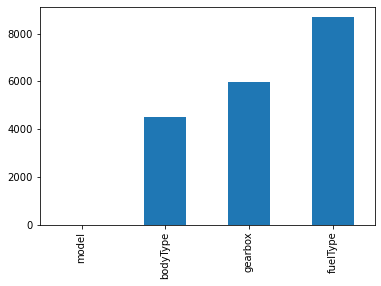

In [91]:
missing = train_data.isnull().sum()
missing = missing[missing>0]
missing.sort_values(inplace=True)
missing.plot.bar()

<AxesSubplot:>

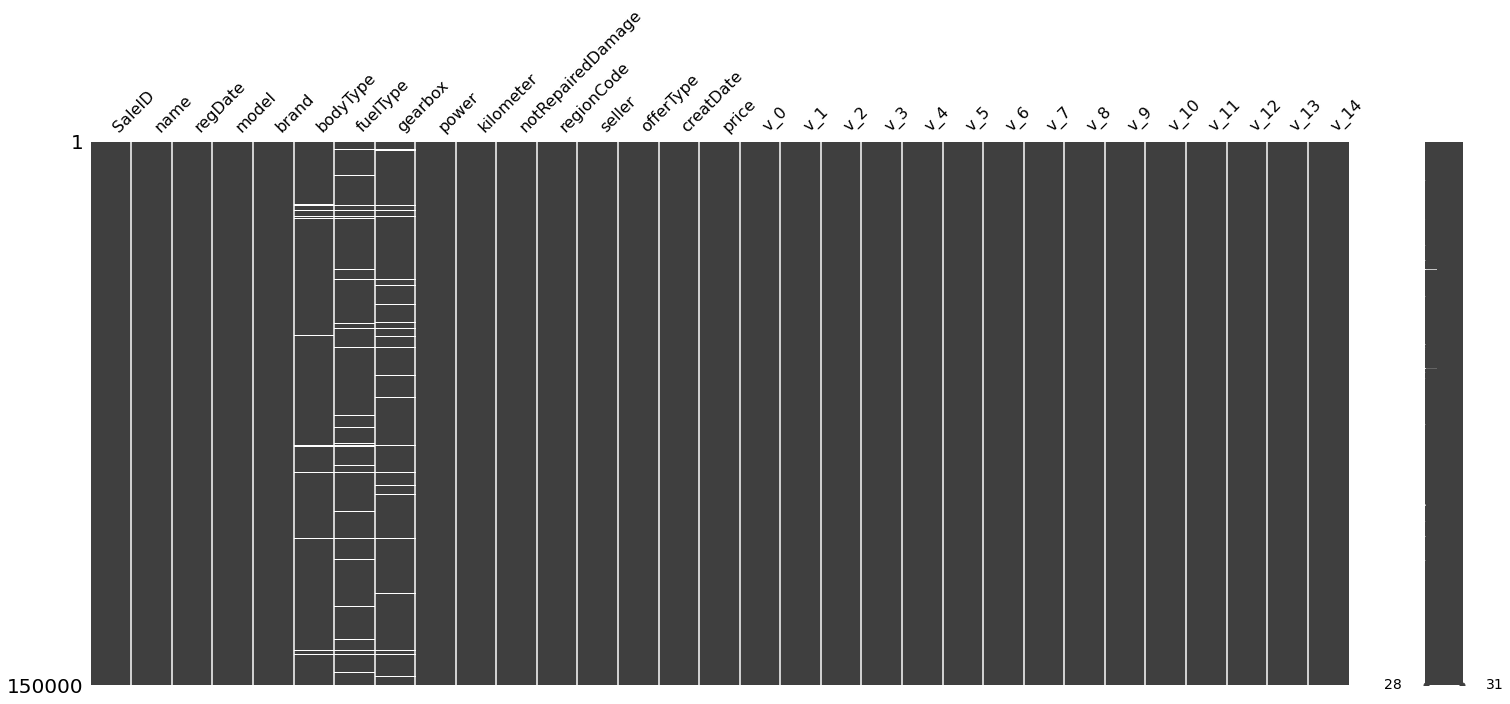

In [92]:
msno.matrix(train_data)

<AxesSubplot:>

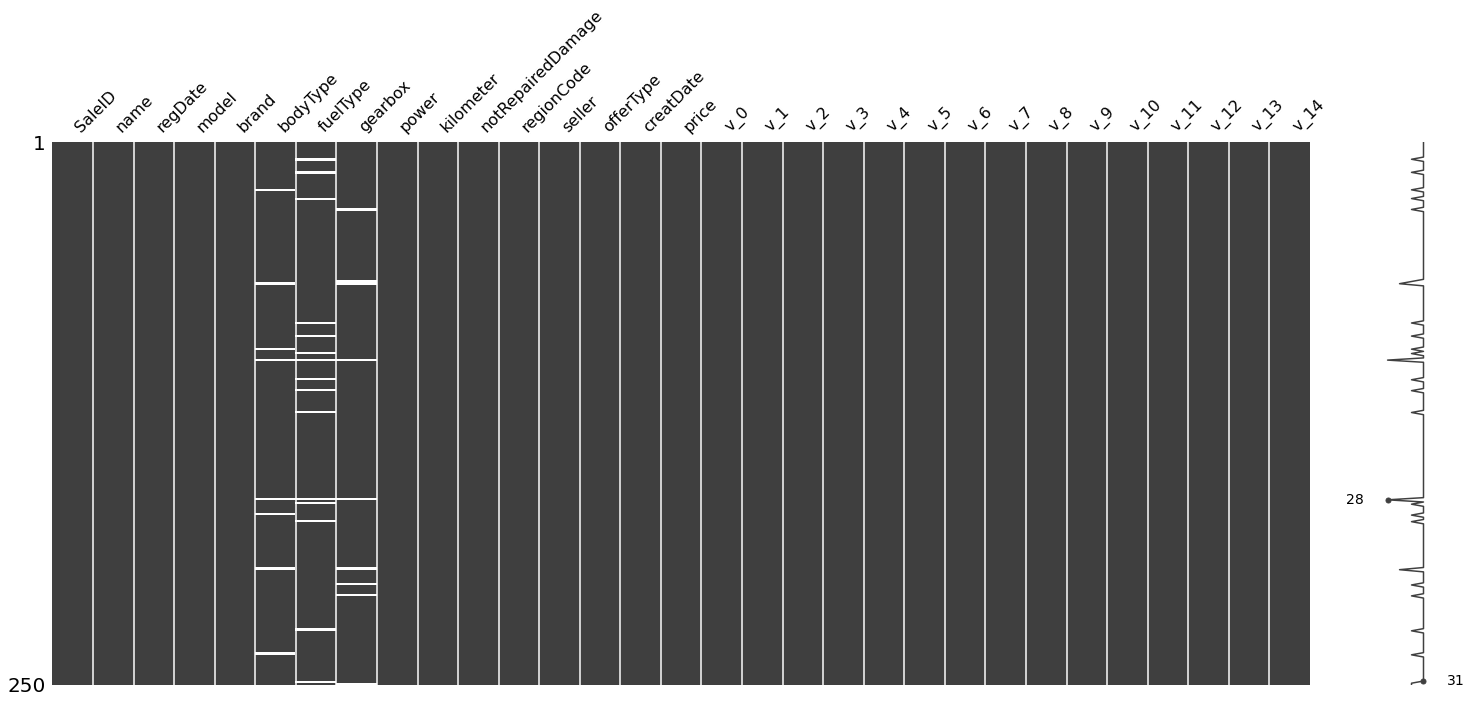

In [93]:
msno.matrix(train_data.sample(250))

<AxesSubplot:>

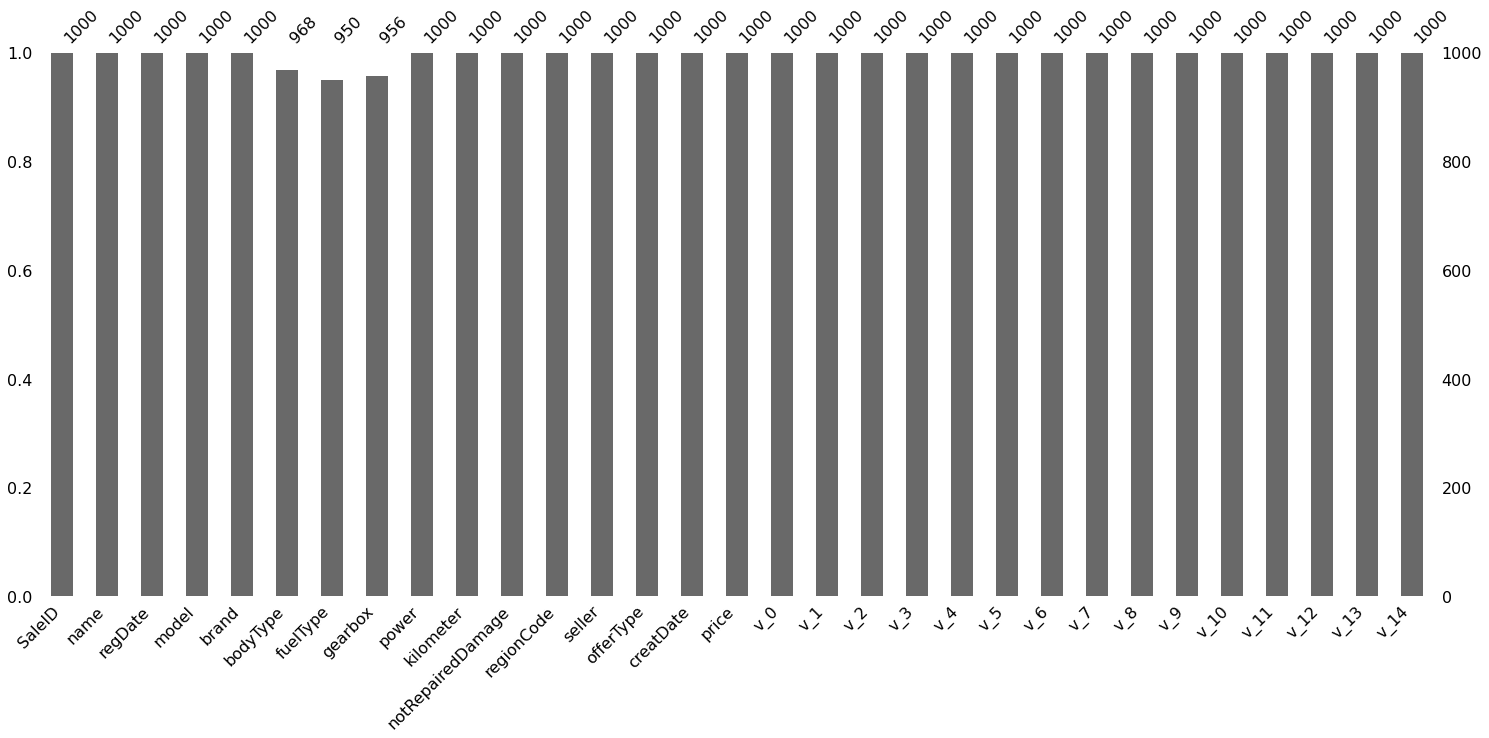

In [94]:
msno.bar(train_data.sample(1000))

In [95]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 31 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   SaleID             150000 non-null  int64  
 1   name               150000 non-null  int64  
 2   regDate            150000 non-null  int64  
 3   model              149999 non-null  float64
 4   brand              150000 non-null  int64  
 5   bodyType           145494 non-null  float64
 6   fuelType           141320 non-null  float64
 7   gearbox            144019 non-null  float64
 8   power              150000 non-null  int64  
 9   kilometer          150000 non-null  float64
 10  notRepairedDamage  150000 non-null  object 
 11  regionCode         150000 non-null  int64  
 12  seller             150000 non-null  int64  
 13  offerType          150000 non-null  int64  
 14  creatDate          150000 non-null  int64  
 15  price              150000 non-null  int64  
 16  v_

In [97]:
train_data['notRepairedDamage'].value_counts()

0.0    111361
-       24324
1.0     14315
Name: notRepairedDamage, dtype: int64

In [98]:
train_data.isnull().sum()

SaleID                  0
name                    0
regDate                 0
model                   1
brand                   0
bodyType             4506
fuelType             8680
gearbox              5981
power                   0
kilometer               0
notRepairedDamage       0
regionCode              0
seller                  0
offerType               0
creatDate               0
price                   0
v_0                     0
v_1                     0
v_2                     0
v_3                     0
v_4                     0
v_5                     0
v_6                     0
v_7                     0
v_8                     0
v_9                     0
v_10                    0
v_11                    0
v_12                    0
v_13                    0
v_14                    0
dtype: int64

In [99]:
test_data['notRepairedDamage'].value_counts()

0.0    37224
-       8069
1.0     4707
Name: notRepairedDamage, dtype: int64

In [100]:
train_data['notRepairedDamage'].replace('-',np.nan,inplace=True)

In [101]:
train_data['notRepairedDamage'].value_counts()

0.0    111361
1.0     14315
Name: notRepairedDamage, dtype: int64

In [102]:
test_data['notRepairedDamage'].replace('-',np.nan,inplace=True)

In [103]:
test_data['notRepairedDamage'].value_counts()

0.0    37224
1.0     4707
Name: notRepairedDamage, dtype: int64

In [104]:
train_data['seller'].value_counts()

0    149999
1         1
Name: seller, dtype: int64

In [105]:
test_data['seller'].value_counts()

0    50000
Name: seller, dtype: int64

In [106]:
train_data['offerType'].value_counts()

0    150000
Name: offerType, dtype: int64

In [107]:
del train_data['seller']
del train_data['offerType']
del test_data['seller']
del test_data['offerType']

In [109]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 29 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   SaleID             150000 non-null  int64  
 1   name               150000 non-null  int64  
 2   regDate            150000 non-null  int64  
 3   model              149999 non-null  float64
 4   brand              150000 non-null  int64  
 5   bodyType           145494 non-null  float64
 6   fuelType           141320 non-null  float64
 7   gearbox            144019 non-null  float64
 8   power              150000 non-null  int64  
 9   kilometer          150000 non-null  float64
 10  notRepairedDamage  125676 non-null  object 
 11  regionCode         150000 non-null  int64  
 12  creatDate          150000 non-null  int64  
 13  price              150000 non-null  int64  
 14  v_0                150000 non-null  float64
 15  v_1                150000 non-null  float64
 16  v_

In [108]:
train_data['price']

0         1850
1         3600
2         6222
3         2400
4         5200
          ... 
149995    5900
149996    9500
149997    7500
149998    4999
149999    4700
Name: price, Length: 150000, dtype: int64

In [110]:
train_data['price'].value_counts()

500      2337
1500     2158
1200     1922
1000     1850
2500     1821
         ... 
1433        1
8911        1
12877       1
9885        1
8188        1
Name: price, Length: 3763, dtype: int64

In [111]:
import scipy.stats as st

<AxesSubplot:title={'center':'johnson su'}, xlabel='price'>

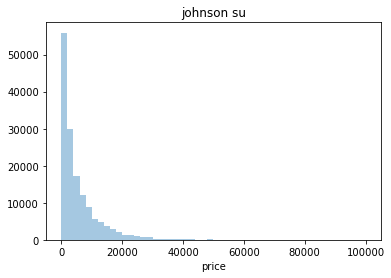

In [122]:
y = train_data['price']
plt.figure(1); plt.title('johnson su')
sns.distplot(y,kde=False)

<AxesSubplot:title={'center':'johnson su'}, xlabel='price', ylabel='Density'>

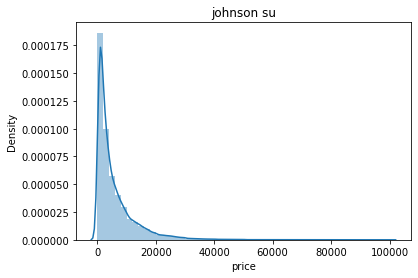

In [123]:
plt.figure(1); plt.title('johnson su')
sns.distplot(y)

In [125]:
sns.distplot?

<AxesSubplot:title={'center':'Log Normal'}, xlabel='price'>

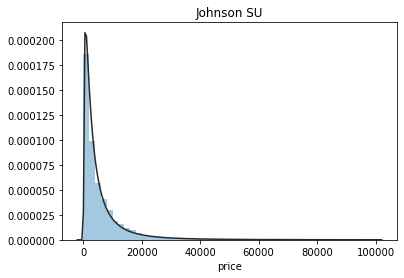

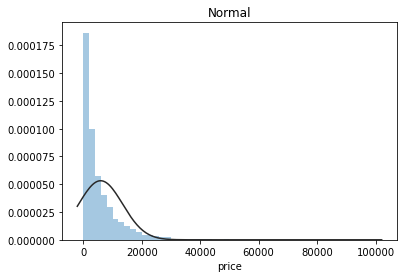

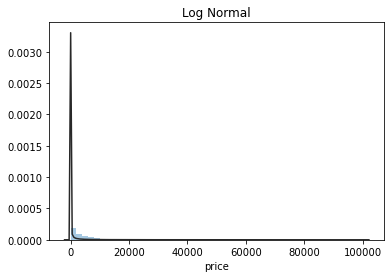

In [119]:
plt.figure(1); plt.title('Johnson SU')
sns.distplot(y, kde=False, fit=st.johnsonsu)
plt.figure(2); plt.title('Normal')
sns.distplot(y, kde=False, fit=st.norm)
plt.figure(3); plt.title('Log Normal')
sns.distplot(y, kde=False, fit=st.lognorm)

<AxesSubplot:title={'center':'Johnson SU'}, xlabel='price'>

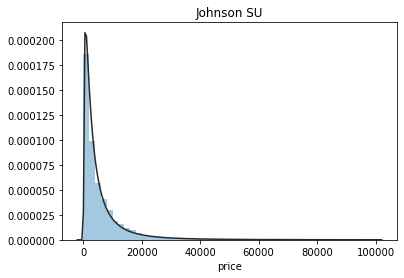

In [120]:
plt.figure(1); plt.title('Johnson SU')
sns.distplot(y, kde=False, fit=st.johnsonsu)

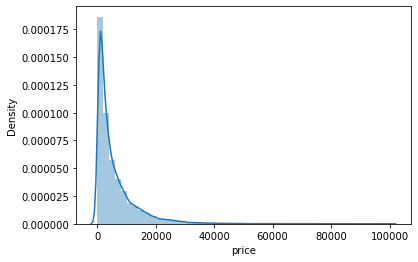

In [126]:
sns.distplot(train_data['price']);

In [128]:
print(train_data['price'].skew())
print(train_data['price'].kurt())

3.3464867626369608
18.995183355632562


In [129]:
train_data.skew(),train_data.kurt()

(SaleID                0.000000
 name                  0.557606
 regDate               0.028495
 model                 1.484388
 brand                 1.150760
 bodyType              0.991530
 fuelType              1.595486
 gearbox               1.317514
 power                65.863178
 kilometer            -1.525921
 notRepairedDamage     2.430640
 regionCode            0.688881
 creatDate           -79.013310
 price                 3.346487
 v_0                  -1.316712
 v_1                   0.359454
 v_2                   4.842556
 v_3                   0.106292
 v_4                   0.367989
 v_5                  -4.737094
 v_6                   0.368073
 v_7                   5.130233
 v_8                   0.204613
 v_9                   0.419501
 v_10                  0.025220
 v_11                  3.029146
 v_12                  0.365358
 v_13                  0.267915
 v_14                 -1.186355
 dtype: float64,
 SaleID                 -1.200000
 name                

<AxesSubplot:xlabel='Skewness'>

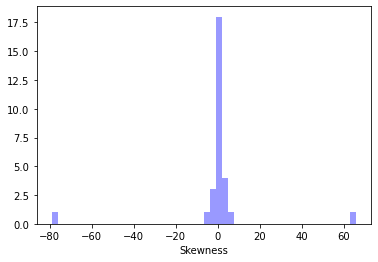

In [136]:
sns.distplot(train_data.skew(),color='blue',axlabel='Skewness',kde=False)

<AxesSubplot:xlabel='Kurtness'>

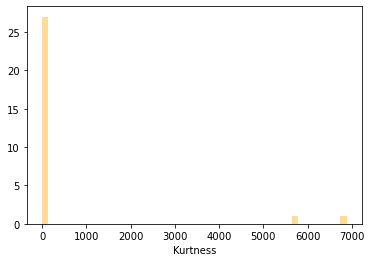

In [133]:
sns.distplot(train_data.kurt(),color='orange',axlabel='Kurtness',kde=False)

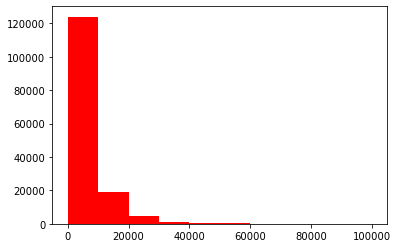

In [139]:
plt.hist(train_data['price'],orientation='vertical',histtype='bar',color='red')
plt.show()

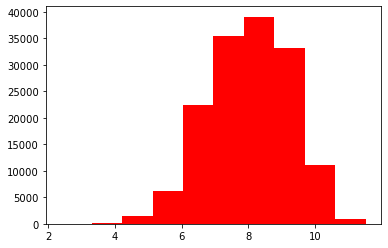

In [140]:
plt.hist(np.log(train_data['price']),orientation='vertical',histtype='bar',color='red')
plt.show()

In [143]:
y_train = train_data['price']
y_train

0         1850
1         3600
2         6222
3         2400
4         5200
          ... 
149995    5900
149996    9500
149997    7500
149998    4999
149999    4700
Name: price, Length: 150000, dtype: int64

In [144]:
numeric_features = ['power', 'kilometer', 'v_0', 'v_1', 'v_2', 'v_3', 'v_4', 'v_5', 'v_6', 'v_7', 'v_8', 'v_9', 'v_10', 'v_11', 'v_12', 'v_13','v_14' ]

categorical_features = ['name', 'model', 'brand', 'bodyType', 'fuelType', 'gearbox', 'notRepairedDamage', 'regionCode',]

In [151]:
for cat_fea in categorical_features:
    print(" ")
    print(cat_fea+"的特征分布如下：")
    print("{}特征有个{}不同的值".format(cat_fea,train_data[cat_fea].nunique()))
    print(train_data[cat_fea].value_counts())

 
name的特征分布如下：
name特征有个99662不同的值
387       282
708       282
55        280
1541      263
203       233
         ... 
26403       1
28450       1
32544       1
102174      1
184730      1
Name: name, Length: 99662, dtype: int64
 
model的特征分布如下：
model特征有个248不同的值
0.0      11762
19.0      9573
4.0       8445
1.0       6038
29.0      5186
         ...  
242.0        2
209.0        2
245.0        2
240.0        2
247.0        1
Name: model, Length: 248, dtype: int64
 
brand的特征分布如下：
brand特征有个40不同的值
0     31480
4     16737
14    16089
10    14249
1     13794
6     10217
9      7306
5      4665
13     3817
11     2945
3      2461
7      2361
16     2223
8      2077
25     2064
27     2053
21     1547
15     1458
19     1388
20     1236
12     1109
22     1085
26      966
30      940
17      913
24      772
28      649
32      592
29      406
37      333
2       321
31      318
18      316
36      228
34      227
33      218
23      186
35      180
38       65
39        9
Name: brand, dtype: int6

In [152]:
for cat_fea in categorical_features:
    print(" ")
    print(cat_fea+"的特征分布如下：")
    print("{}特征有个{}不同的值".format(cat_fea,test_data[cat_fea].nunique()))
    print(test_data[cat_fea].value_counts())

 
name的特征分布如下：
name特征有个37536不同的值
387       94
55        93
1541      86
708       85
203       78
          ..
111229     1
11454      1
189047     1
86748      1
4094       1
Name: name, Length: 37536, dtype: int64
 
model的特征分布如下：
model特征有个245不同的值
0.0      3772
19.0     3226
4.0      2790
1.0      1981
29.0     1778
         ... 
229.0       2
209.0       2
241.0       1
242.0       1
244.0       1
Name: model, Length: 245, dtype: int64
 
brand的特征分布如下：
brand特征有个40不同的值
0     10473
4      5532
14     5345
10     4713
1      4627
6      3500
9      2360
5      1485
13     1386
11      942
3       820
16      770
25      728
7       727
8       708
27      623
21      543
15      476
19      473
20      411
12      399
22      358
26      328
30      321
17      312
24      248
28      216
32      183
29      139
37      117
2       115
31      113
18      107
33       84
35       75
34       75
36       72
23       60
38       31
39        5
Name: brand, dtype: int64
 
bodyType的特征分布如下：
b

In [154]:
numeric_features.append('price')

In [155]:
numeric_features

['power',
 'kilometer',
 'v_0',
 'v_1',
 'v_2',
 'v_3',
 'v_4',
 'v_5',
 'v_6',
 'v_7',
 'v_8',
 'v_9',
 'v_10',
 'v_11',
 'v_12',
 'v_13',
 'v_14',
 'price']

In [156]:
train_data.head()

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
0,0,736,20040402,30.0,6,1.0,0.0,0.0,60,12.5,...,0.235676,0.101988,0.129549,0.022816,0.097462,-2.881803,2.804097,-2.420821,0.795292,0.914762
1,1,2262,20030301,40.0,1,2.0,0.0,0.0,0,15.0,...,0.264777,0.121004,0.135731,0.026597,0.020582,-4.900482,2.096338,-1.030483,-1.722674,0.245522
2,2,14874,20040403,115.0,15,1.0,0.0,0.0,163,12.5,...,0.251410,0.114912,0.165147,0.062173,0.027075,-4.846749,1.803559,1.565330,-0.832687,-0.229963
3,3,71865,19960908,109.0,10,0.0,0.0,1.0,193,15.0,...,0.274293,0.110300,0.121964,0.033395,0.000000,-4.509599,1.285940,-0.501868,-2.438353,-0.478699
4,4,111080,20120103,110.0,5,1.0,0.0,0.0,68,5.0,...,0.228036,0.073205,0.091880,0.078819,0.121534,-1.896240,0.910783,0.931110,2.834518,1.923482


In [165]:
price_numeric = train_data[numeric_features]
correlation = price_numeric.corr()
print(correlation['price'].sort_values(ascending=False))

price        1.000000
v_12         0.692823
v_8          0.685798
v_0          0.628397
power        0.219834
v_5          0.164317
v_2          0.085322
v_6          0.068970
v_1          0.060914
v_14         0.035911
v_13        -0.013993
v_7         -0.053024
v_4         -0.147085
v_9         -0.206205
v_10        -0.246175
v_11        -0.275320
kilometer   -0.440519
v_3         -0.730946
Name: price, dtype: float64


<AxesSubplot:title={'center':'correlation of numeric features with price'}>

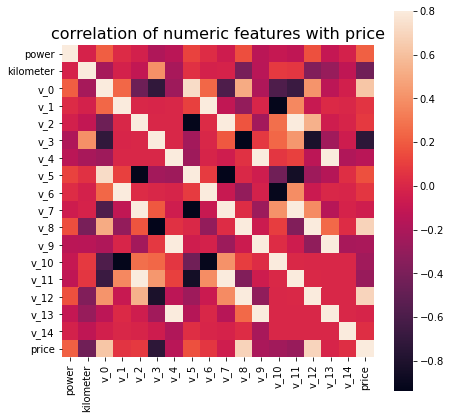

In [168]:
f,ax = plt.subplots(figsize=(7,7))
plt.title('correlation of numeric features with price',y=1,size=16)
sns.heatmap(correlation,square=True,vmax=0.8)

In [169]:
price_numerice

,power,kilometer,v_0,v_1,v_2,v_3,v_4,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14,price
0,60,12.5,43.357796,3.966344,0.050257,2.159744,1.143786,0.235676,0.101988,0.129549,0.022816,0.097462,-2.881803,2.804097,-2.420821,0.795292,0.914762,1850
1,0,15.0,45.305273,5.236112,0.137925,1.380657,-1.422165,0.264777,0.121004,0.135731,0.026597,0.020582,-4.900482,2.096338,-1.030483,-1.722674,0.245522,3600
2,163,12.5,45.978359,4.823792,1.319524,-0.998467,-0.996911,0.251410,0.114912,0.165147,0.062173,0.027075,-4.846749,1.803559,1.565330,-0.832687,-0.229963,6222
3,193,15.0,45.687478,4.492574,-0.050616,0.883600,-2.228079,0.274293,0.110300,0.121964,0.033395,0.000000,-4.509599,1.285940,-0.501868,-2.438353,-0.478699,2400
4,68,5.0,44.383511,2.031433,0.572169,-1.571239,2.246088,0.228036,0.073205,0.091880,0.078819,0.121534,-1.896240,0.910783,0.931110,2.834518,1.923482,5200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,163,15.0,45.316543,-3.139095,-1.269707,-0.736609,-1.505820,0.280264,0.000310,0.048441,0.071158,0.019174,1.988114,-2.983973,0.589167,-1.304370,-0.302592,5900
149996,125,10.0,45.972058,-3.143764,-0.023523,-2.366699,0.698012,0.253217,0.000777,0.084079,0.099681,0.079371,1.839166,-2.774615,2.553994,0.924196,-0.272160,9500
149997,90,6.0,44.733481,-3.105721,0.595454,-2.279091,1.423661,0.233353,0.000705,0.118872,0.100118,0.097914,2.439812,-1.630677,2.290197,1.891922,0.414931,7500
149998,156,15.0,45.658634,-3.204785,-0.441680,-1.179812,0.620680,0.256369,0.000252,0.081479,0.083558,0.081498,2.075380,-2.633719,1.414937,0.431981,-1.659014,4999


In [170]:
del price_numeric['price']

In [176]:
for col in numeric_features:
    print('{:15}'.format(col),
          'skewness:{:05.2f}'.format(train_data[col].skew()),
          '   ',
          'kurtosis:{:06.2f}'.format(train_data[col].kurt())
         )

power           skewness:65.86     kurtosis:5733.45
kilometer       skewness:-1.53     kurtosis:001.14
v_0             skewness:-1.32     kurtosis:003.99
v_1             skewness:00.36     kurtosis:-01.75
v_2             skewness:04.84     kurtosis:023.86
v_3             skewness:00.11     kurtosis:-00.42
v_4             skewness:00.37     kurtosis:-00.20
v_5             skewness:-4.74     kurtosis:022.93
v_6             skewness:00.37     kurtosis:-01.74
v_7             skewness:05.13     kurtosis:025.85
v_8             skewness:00.20     kurtosis:-00.64
v_9             skewness:00.42     kurtosis:-00.32
v_10            skewness:00.03     kurtosis:-00.58
v_11            skewness:03.03     kurtosis:012.57
v_12            skewness:00.37     kurtosis:000.27
v_13            skewness:00.27     kurtosis:-00.44
v_14            skewness:-1.19     kurtosis:002.39
price           skewness:03.35     kurtosis:019.00


In [177]:
numeric_features

['power',
 'kilometer',
 'v_0',
 'v_1',
 'v_2',
 'v_3',
 'v_4',
 'v_5',
 'v_6',
 'v_7',
 'v_8',
 'v_9',
 'v_10',
 'v_11',
 'v_12',
 'v_13',
 'v_14',
 'price']

In [178]:
f = pd.melt(train_data,value_vars = numeric_features)

In [179]:
f

,variable,value
0,power,60.0
1,power,0.0
2,power,163.0
3,power,193.0
4,power,68.0
...,...,...
2699995,price,5900.0
2699996,price,9500.0
2699997,price,7500.0
2699998,price,4999.0


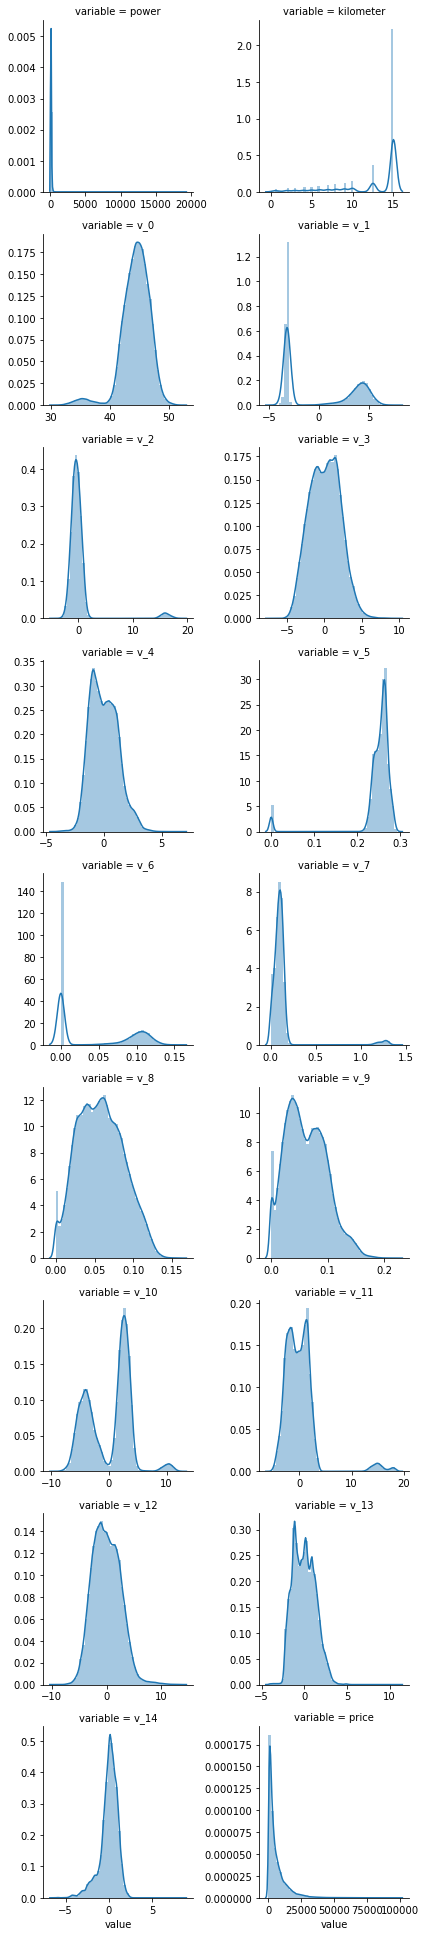

In [184]:
g = sns.FacetGrid(f,col='variable',col_wrap=2,sharex=False,sharey=False)
g = g.map(sns.distplot,'value')

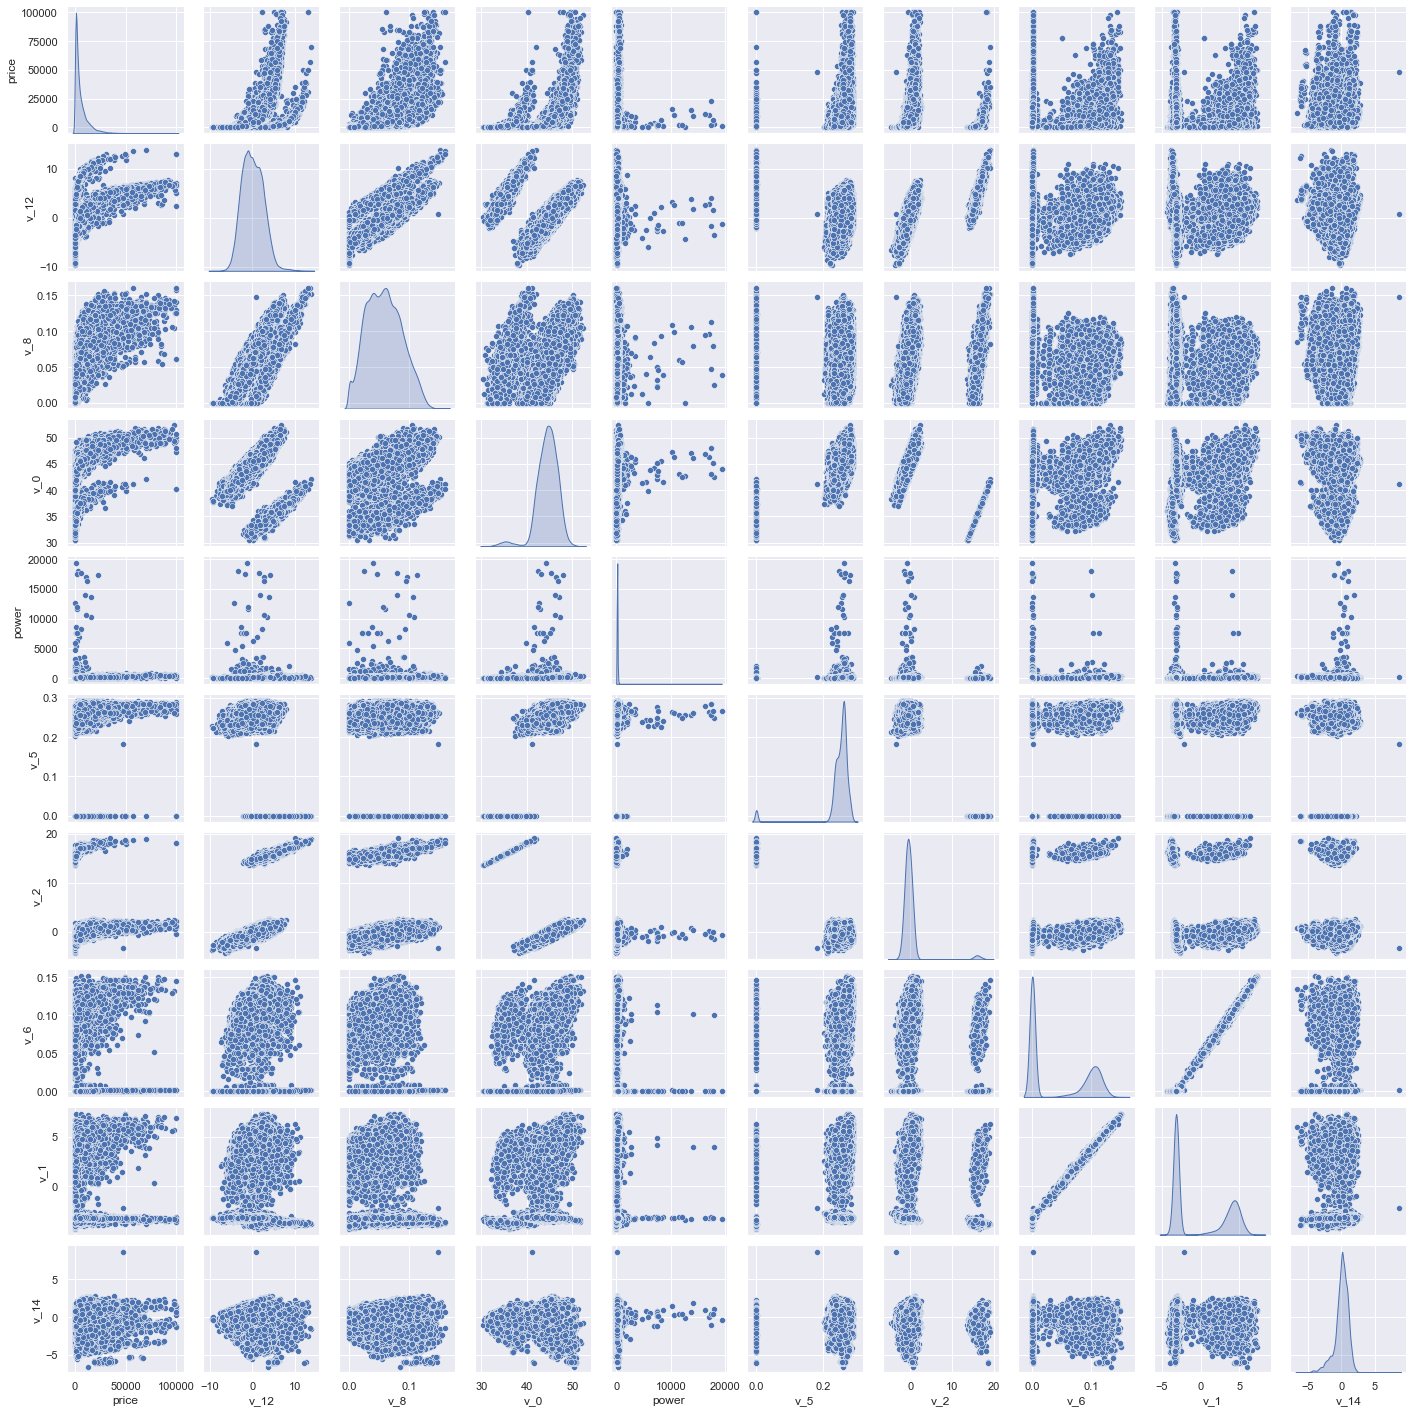

In [185]:
sns.set()
columns = ['price', 'v_12', 'v_8' , 'v_0', 'power', 'v_5',  'v_2', 'v_6', 'v_1', 'v_14']
sns.pairplot(train_data[columns],size=2,kind='scatter',diag_kind='kde')
plt.show()

In [189]:
import pandas_profiling

In [191]:
pfr = pandas_profiling.ProfileReport(train_data)
pfr.to_file("./example.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# 3.特征工程

In [146]:
from operator import itemgetter

In [147]:
path = 'D:/data analysis/天池-二手车/'
train_data = pd.read_csv(path+'used_car_train_20200313.csv',sep=' ')
test_data = pd.read_csv(path+'used_car_testB_20200421.csv',sep= ' ')

In [148]:
def outliers_proc(data,col_name,scale=3):
    def box_plot_outliers(data_ser,box_scale):
        iqr = box_scale * (data_ser.quantile(0.75) - data_ser.quantile(0.25))
        val_low = data_ser.quantile(0.25) - iqr
        val_up = data_ser.quantile(0.75) + iqr
        rule_low = (data_ser < val_low)
        rule_up = (data_ser > val_up)
        return (rule_low,rule_up),(val_low,val_up)
    data_n = data.copy()
    data_series = data_n[col_name]
    rule,value = box_plot_outliers(data_series,box_scale=scale)
    index = np.arange(data_series.shape[0])[rule[0] | rule[1]]
    print("Delete number is: {}".format(len(index)))
    data_n = data_n.drop(index)
    data_n.reset_index(drop=True,inplace=True)
    print("Now column number is: {}".format(len(index)))
    index_low = np.arange(data_series.shape[0])[rule[0]]
    outliers = data_series.iloc[index_low]
    print("Description of data less than the lower bound is:")
    print(pd.Series(outliers).describe())
    index_up = np.arange(data_series.shape[0])[rule[1]]
    outliers = data_series.iloc[index_up]
    print("Description of data larger than the upper bound is:")
    print(pd.Series(outliers).describe())

    fig,ax = plt.subplots(1,2,figsize=(10,7))
    sns.boxplot(y=data[col_name],data=data,palette="Set1",ax=ax[0])
    sns.boxplot(y=data_n[col_name],data=data_n,palette="Set1",ax=ax[1])
    return data_n

Delete number is: 963
Now column number is: 963
Description of data less than the lower bound is:
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: power, dtype: float64
Description of data larger than the upper bound is:
count      963.000000
mean       846.836968
std       1929.418081
min        376.000000
25%        400.000000
50%        436.000000
75%        514.000000
max      19312.000000
Name: power, dtype: float64


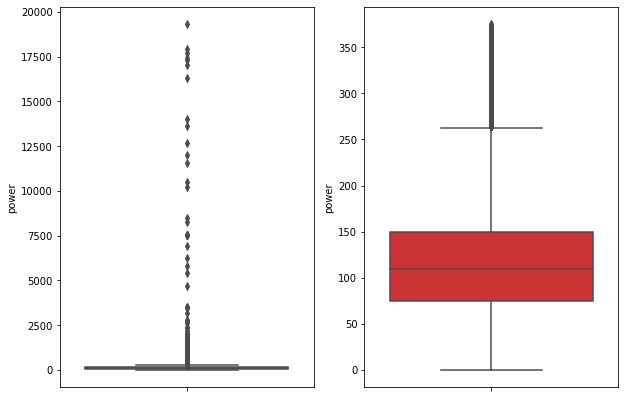

In [149]:
train_data = outliers_proc(train_data,'power',scale=3)

In [150]:
train_data['train'] = 1
test_data['train'] = 0
data = pd.concat([train_data,test_data],ignore_index=True)

In [151]:
data

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14,train
0,0,736,20040402,30.0,6,1.0,0.0,0.0,60,12.5,...,0.101988,0.129549,0.022816,0.097462,-2.881803,2.804097,-2.420821,0.795292,0.914762,1
1,1,2262,20030301,40.0,1,2.0,0.0,0.0,0,15.0,...,0.121004,0.135731,0.026597,0.020582,-4.900482,2.096338,-1.030483,-1.722674,0.245522,1
2,2,14874,20040403,115.0,15,1.0,0.0,0.0,163,12.5,...,0.114912,0.165147,0.062173,0.027075,-4.846749,1.803559,1.565330,-0.832687,-0.229963,1
3,3,71865,19960908,109.0,10,0.0,0.0,1.0,193,15.0,...,0.110300,0.121964,0.033395,0.000000,-4.509599,1.285940,-0.501868,-2.438353,-0.478699,1
4,4,111080,20120103,110.0,5,1.0,0.0,0.0,68,5.0,...,0.073205,0.091880,0.078819,0.121534,-1.896240,0.910783,0.931110,2.834518,1.923482,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199032,249995,111443,20041005,4.0,4,0.0,NaN,1.0,150,15.0,...,0.000292,0.141804,0.076393,0.039272,2.072901,-2.531869,1.716978,-1.063437,0.326587,0
199033,249996,152834,20130409,65.0,1,0.0,0.0,0.0,179,4.0,...,0.000991,0.155868,0.108425,0.067841,1.358504,-3.290295,4.269809,0.140524,0.556221,0
199034,249997,132531,20041211,4.0,4,0.0,0.0,1.0,147,12.5,...,0.000318,0.141872,0.071968,0.042966,2.165658,-2.417885,1.370612,-1.073133,0.270602,0
199035,249998,143405,20020702,40.0,1,4.0,0.0,1.0,176,15.0,...,0.000023,0.067483,0.067526,0.009006,2.030114,-2.939244,0.569078,-1.718245,0.316379,0


In [152]:
pd.to_datetime?

In [153]:
data['used_time'] = (pd.to_datetime(data['creatDate'],format='%Y%m%d',errors='coerce') - pd.to_datetime(data['regDate'],format='%Y%m%d',errors='coerce')).dt.days

In [154]:
data['used_time'].isnull().sum()

15054

In [155]:
data['city'] = data['regionCode'].apply(lambda x : str(x)[:-3])
data

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,v_8,v_9,v_10,v_11,v_12,v_13,v_14,train,used_time,city
0,0,736,20040402,30.0,6,1.0,0.0,0.0,60,12.5,...,0.022816,0.097462,-2.881803,2.804097,-2.420821,0.795292,0.914762,1,4385.0,1
1,1,2262,20030301,40.0,1,2.0,0.0,0.0,0,15.0,...,0.026597,0.020582,-4.900482,2.096338,-1.030483,-1.722674,0.245522,1,4757.0,4
2,2,14874,20040403,115.0,15,1.0,0.0,0.0,163,12.5,...,0.062173,0.027075,-4.846749,1.803559,1.565330,-0.832687,-0.229963,1,4382.0,2
3,3,71865,19960908,109.0,10,0.0,0.0,1.0,193,15.0,...,0.033395,0.000000,-4.509599,1.285940,-0.501868,-2.438353,-0.478699,1,7125.0,
4,4,111080,20120103,110.0,5,1.0,0.0,0.0,68,5.0,...,0.078819,0.121534,-1.896240,0.910783,0.931110,2.834518,1.923482,1,1531.0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199032,249995,111443,20041005,4.0,4,0.0,NaN,1.0,150,15.0,...,0.076393,0.039272,2.072901,-2.531869,1.716978,-1.063437,0.326587,0,4173.0,5
199033,249996,152834,20130409,65.0,1,0.0,0.0,0.0,179,4.0,...,0.108425,0.067841,1.358504,-3.290295,4.269809,0.140524,0.556221,0,1079.0,5
199034,249997,132531,20041211,4.0,4,0.0,0.0,1.0,147,12.5,...,0.071968,0.042966,2.165658,-2.417885,1.370612,-1.073133,0.270602,0,4113.0,3
199035,249998,143405,20020702,40.0,1,4.0,0.0,1.0,176,15.0,...,0.067526,0.009006,2.030114,-2.939244,0.569078,-1.718245,0.316379,0,5017.0,


In [156]:
train_gb = train_data.groupby("brand")
all_info = {}

In [157]:
for i,j in train_gb:
    print(i)
    print(j)
    

0
        SaleID    name   regDate  model  brand  bodyType  fuelType  gearbox  \
14          14    1896  20070009    1.0      0       NaN       NaN      0.0   
19          19   15738  20000306    0.0      0       0.0       0.0      0.0   
21          21   12784  20021009    8.0      0       0.0       NaN      NaN   
34          34  107569  20130409    0.0      0       0.0       1.0      0.0   
42          42   20694  19960009    0.0      0       4.0       NaN      0.0   
...        ...     ...       ...    ...    ...       ...       ...      ...   
148998  149961   65509  19940711    1.0      0       2.0       0.0      0.0   
149008  149971  176038  20050801   29.0      0       1.0       0.0      0.0   
149015  149978   62578  20020402   44.0      0       3.0       1.0      0.0   
149020  149983    2825  20090502    0.0      0       0.0       0.0      0.0   
149025  149988     261  20090912    0.0      0       0.0       0.0      0.0   

        power  kilometer  ...       v_6       v_7

        SaleID    name   regDate  model  brand  bodyType  fuelType  gearbox  \
9            9   82021  19980101    7.0      7       5.0       0.0      0.0   
23          23    8949  19940401   78.0      7       5.0       0.0      0.0   
29          29    4365  20031008    7.0      7       0.0       0.0      0.0   
47          47    5162  20080412   78.0      7       2.0       1.0      0.0   
59          59  162381  19980902  155.0      7       4.0       0.0      0.0   
...        ...     ...       ...    ...    ...       ...       ...      ...   
148668  149628   80733  19951205    1.0      7       1.0       0.0      0.0   
148766  149727   45941  20011012   19.0      7       2.0       0.0      0.0   
148865  149826   35555  20050907   85.0      7       3.0       0.0      0.0   
148886  149847   51140  19981210    1.0      7       1.0       0.0      0.0   
148889  149850   15638  19951111  155.0      7       4.0       0.0      0.0   

        power  kilometer  ...       v_6       v_7  

        SaleID    name   regDate  model  brand  bodyType  fuelType  gearbox  \
2            2   14874  20040403  115.0     15       1.0       0.0      0.0   
43          43  189569  20040908  115.0     15       1.0       0.0      0.0   
67          67  128546  20070108   20.0     15       1.0       0.0      0.0   
203        205  192340  20000709   19.0     15       1.0       0.0      0.0   
437        440   34769  20150304  115.0     15       0.0       0.0      0.0   
...        ...     ...       ...    ...    ...       ...       ...      ...   
148630  149590  189345  20050903  115.0     15       4.0       0.0      0.0   
148840  149801     725  20090402   20.0     15       1.0       0.0      0.0   
148883  149844    5869  20110903  115.0     15       1.0       1.0      0.0   
148891  149852     725  20110704   20.0     15       1.0       0.0      0.0   
148917  149878   20189  20030802   20.0     15       1.0       0.0      0.0   

        power  kilometer  ...       v_6       v_7  

        SaleID    name   regDate  model  brand  bodyType  fuelType  gearbox  \
344        347  146830  19951111    1.0     26       4.0       0.0      0.0   
357        360  171323  20050002    1.0     26       NaN       1.0      NaN   
395        398   82696  20100202    1.0     26       6.0       1.0      1.0   
645        650  107772  20051212    1.0     26       6.0       1.0      1.0   
1109      1118  160927  20000705    1.0     26       6.0       2.0      1.0   
...        ...     ...       ...    ...    ...       ...       ...      ...   
148543  149502   58437  19910203    1.0     26       7.0       NaN      1.0   
148724  149685    3174  20000003    1.0     26       NaN       NaN      NaN   
148967  149929   99660  20031201    1.0     26       0.0       0.0      0.0   
148974  149936   26357  20090603    1.0     26       2.0       0.0      1.0   
148993  149956   42447  20010710    1.0     26       0.0       0.0      1.0   

        power  kilometer  ...       v_6       v_7  

[228 rows x 32 columns]
37
        SaleID    name   regDate  model  brand  bodyType  fuelType  gearbox  \
57          57   15668  20061212  200.0     37       6.0       1.0      1.0   
104        105    9679  20061008  199.0     37       6.0       1.0      1.0   
665        670  112449  20080501  206.0     37       6.0       1.0      0.0   
1039      1047   41832  20150606  202.0     37       6.0       1.0      1.0   
1122      1131   94578  20130404  206.0     37       6.0       1.0      0.0   
...        ...     ...       ...    ...    ...       ...       ...      ...   
147206  148150  147179  20031211  200.0     37       6.0       1.0      0.0   
147735  148686   38222  20020512  189.0     37       6.0       1.0      1.0   
147749  148700  151140  20130508  202.0     37       6.0       1.0      1.0   
148242  149199   74313  20100111  200.0     37       6.0       1.0      0.0   
148855  149816   13622  19990406  157.0     37       6.0       1.0      0.0   

        power  kilometer

In [158]:
for kind,kind_data in train_gb:
    info = {}
    kind_data = kind_data[kind_data['price']>0]
    info['brand_amount'] = len(kind_data)
    info['brand_price_max'] = kind_data.price.max()
    info['brand_price_median'] = kind_data.price.median()
    info['brand_price_min'] = kind_data.price.min()
    info['brand_price_sum'] = kind_data.price.sum()
    info['brand_price_std'] = kind_data.price.std()
    info['brand_price_average'] = round(kind_data.price.sum() / (len(kind_data)+1),2)
    all_info[kind] = info

In [159]:
all_info

{0: {'brand_amount': 31429,
  'brand_price_max': 68500,
  'brand_price_median': 3199.0,
  'brand_price_min': 13,
  'brand_price_sum': 173719698,
  'brand_price_std': 6261.371627193848,
  'brand_price_average': 5527.19},
 1: {'brand_amount': 13656,
  'brand_price_max': 84000,
  'brand_price_median': 6399.0,
  'brand_price_min': 15,
  'brand_price_sum': 124044603,
  'brand_price_std': 8988.865406006897,
  'brand_price_average': 9082.86},
 2: {'brand_amount': 318,
  'brand_price_max': 55800,
  'brand_price_median': 7500.0,
  'brand_price_min': 35,
  'brand_price_sum': 3766241,
  'brand_price_std': 10576.224443852676,
  'brand_price_average': 11806.4},
 3: {'brand_amount': 2461,
  'brand_price_max': 37500,
  'brand_price_median': 4990.0,
  'brand_price_min': 65,
  'brand_price_sum': 15954226,
  'brand_price_std': 5396.32750326748,
  'brand_price_average': 6480.19},
 4: {'brand_amount': 16575,
  'brand_price_max': 99999,
  'brand_price_median': 5999.0,
  'brand_price_min': 12,
  'brand_pric

In [160]:
pd.DataFrame(all_info).T.reset_index().rename(columns={"index":"brand"})

,brand,brand_amount,brand_price_max,brand_price_median,brand_price_min,brand_price_sum,brand_price_std,brand_price_average
0,0,31429.0,68500.0,3199.0,13.0,173719698.0,6261.371627,5527.19
1,1,13656.0,84000.0,6399.0,15.0,124044603.0,8988.865406,9082.86
2,2,318.0,55800.0,7500.0,35.0,3766241.0,10576.224444,11806.40
3,3,2461.0,37500.0,4990.0,65.0,15954226.0,5396.327503,6480.19
4,4,16575.0,99999.0,5999.0,12.0,138279069.0,8089.863295,8342.13
5,5,4662.0,31500.0,2300.0,20.0,15414322.0,3344.689763,3305.67
6,6,10193.0,35990.0,1800.0,13.0,36457518.0,4562.233331,3576.37
7,7,2360.0,38900.0,2600.0,60.0,9905909.0,4752.584154,4195.64
8,8,2070.0,99999.0,2270.0,30.0,10017173.0,6053.233424,4836.88
9,9,7299.0,68530.0,1400.0,50.0,17805271.0,2975.342884,2439.08


In [161]:
brand_fe = pd.DataFrame(all_info).T.reset_index().rename(columns={"index":"brand"})

In [162]:
data = data.merge(brand_fe,how='left',on='brand')

In [163]:
data['power'].nunique()

468

In [164]:
data['power'].describe()

count    199037.000000
mean        115.909735
std         117.400475
min           0.000000
25%          75.000000
50%         109.000000
75%         150.000000
max       19211.000000
Name: power, dtype: float64

In [165]:
bin = [i*10 for i in range(31)]

In [166]:
data['power']

0          60
1           0
2         163
3         193
4          68
         ... 
199032    150
199033    179
199034    147
199035    176
199036      0
Name: power, Length: 199037, dtype: int64

In [167]:
data['power_bin'] = pd.cut(data['power'],bin,labels=False)

In [168]:
data[['power_bin','power']].head()

,power_bin,power
0,5.0,60
1,NaN,0
2,16.0,163
3,19.0,193
4,6.0,68


In [169]:
data = data.drop(['creatDate','regDate','regionCode'],axis=1)

In [170]:
print(data.shape)
data.columns

(199037, 39)


Index(['SaleID', 'name', 'model', 'brand', 'bodyType', 'fuelType', 'gearbox',
       'power', 'kilometer', 'notRepairedDamage', 'seller', 'offerType',
       'price', 'v_0', 'v_1', 'v_2', 'v_3', 'v_4', 'v_5', 'v_6', 'v_7', 'v_8',
       'v_9', 'v_10', 'v_11', 'v_12', 'v_13', 'v_14', 'train', 'used_time',
       'city', 'brand_amount', 'brand_price_max', 'brand_price_median',
       'brand_price_min', 'brand_price_sum', 'brand_price_std',
       'brand_price_average', 'power_bin'],
      dtype='object')

In [171]:
data.to_csv('data_for_tree.csv',index=0)

<AxesSubplot:ylabel='Frequency'>

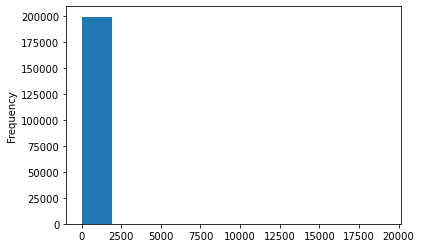

In [172]:
data['power'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

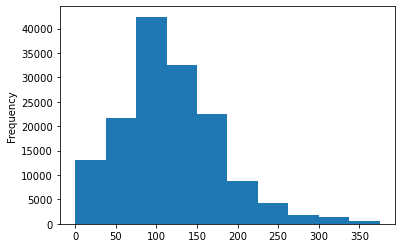

In [173]:
train_data['power'].plot.hist()

In [174]:
from sklearn import preprocessing

In [175]:
min_max_scaler = preprocessing.MinMaxScaler()

<AxesSubplot:ylabel='Frequency'>

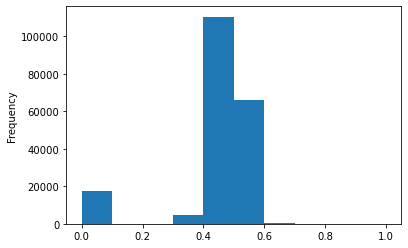

In [176]:
data['power'] = np.log(data['power'] + 1)
data['power'] = ((data['power'] - np.min(data['power'])) / (np.max(data['power']) - np.min(data['power'])))
data['power'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

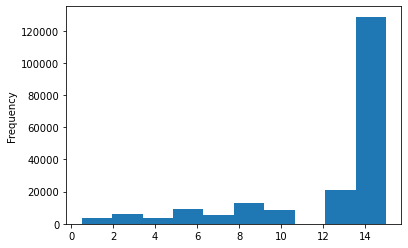

In [177]:
data['kilometer'].plot.hist()

In [178]:
data['kilometer']

0         12.5
1         15.0
2         12.5
3         15.0
4          5.0
          ... 
199032    15.0
199033     4.0
199034    12.5
199035    15.0
199036     3.0
Name: kilometer, Length: 199037, dtype: float64

<AxesSubplot:ylabel='Frequency'>

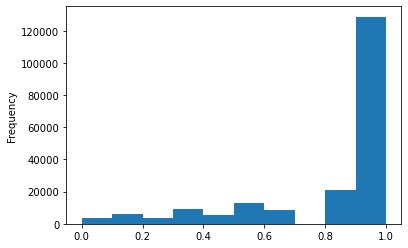

In [179]:
data['kilometer'] = ((data['kilometer'] - np.min(data['kilometer'])) / (np.max(data['kilometer']) - np.min(data['kilometer'])))
data['kilometer'].plot.hist()

In [180]:
data['brand_amount']

0         10193.0
1         13656.0
2          1458.0
3         13994.0
4          4662.0
           ...   
199032    16575.0
199033    13656.0
199034    16575.0
199035    13656.0
199036     2070.0
Name: brand_amount, Length: 199037, dtype: float64

In [181]:
def max_min(x):
    return (x - np.min(x)) / (np.max(x) - np.min(x))

In [182]:
max_min(data['brand_amount'])

0         0.324125
1         0.434341
2         0.046117
3         0.445099
4         0.148090
            ...   
199032    0.527244
199033    0.434341
199034    0.527244
199035    0.434341
199036    0.065595
Name: brand_amount, Length: 199037, dtype: float64

In [183]:
for brand in ['brand_amount','brand_price_average','brand_price_max','brand_price_median','brand_price_min','brand_price_std','brand_price_sum']:
    data[brand] = max_min(data[brand])

In [184]:
data

,SaleID,name,model,brand,bodyType,fuelType,gearbox,power,kilometer,notRepairedDamage,...,used_time,city,brand_amount,brand_price_max,brand_price_median,brand_price_min,brand_price_sum,brand_price_std,brand_price_average,power_bin
0,0,736,30.0,6,1.0,0.0,0.0,0.416785,0.827586,0.0,...,4385.0,1,0.324125,0.340786,0.032075,0.002064,0.209684,0.207660,0.081655,5.0
1,1,2262,40.0,1,2.0,0.0,0.0,0.000000,1.000000,-,...,4757.0,4,0.434341,0.835230,0.205623,0.004128,0.713985,0.437002,0.257305,NaN
2,2,14874,115.0,15,1.0,0.0,0.0,0.517055,0.827586,0.0,...,4382.0,2,0.046117,0.433578,0.284906,0.091847,0.082533,0.252362,0.281834,16.0
3,3,71865,109.0,10,0.0,0.0,1.0,0.534087,1.000000,0.0,...,7125.0,,0.445099,0.926889,0.160377,0.004128,0.650591,0.398447,0.225212,19.0
4,4,111080,110.0,5,1.0,0.0,0.0,0.429279,0.310345,0.0,...,1531.0,6,0.148090,0.294545,0.050943,0.009288,0.088524,0.144579,0.073020,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199032,249995,111443,4.0,4,0.0,NaN,1.0,0.508682,1.000000,-,...,4173.0,5,0.527244,1.000000,0.190528,0.001032,0.795943,0.390425,0.233677,14.0
199033,249996,152834,65.0,1,0.0,0.0,0.0,0.526493,0.241379,0.0,...,1079.0,5,0.434341,0.835230,0.205623,0.004128,0.713985,0.437002,0.257305,17.0
199034,249997,132531,4.0,4,0.0,0.0,1.0,0.506648,0.827586,0.0,...,4113.0,3,0.527244,1.000000,0.190528,0.001032,0.795943,0.390425,0.233677,14.0
199035,249998,143405,40.0,1,4.0,0.0,1.0,0.524789,1.000000,0.0,...,5017.0,,0.434341,0.835230,0.205623,0.004128,0.713985,0.437002,0.257305,17.0


In [185]:
data = pd.get_dummies(data,columns=['model','brand','bodyType','fuelType','gearbox','notRepairedDamage','power_bin'])

In [186]:
print(data.shape)

(199037, 370)


In [187]:
data.columns

Index(['SaleID', 'name', 'power', 'kilometer', 'seller', 'offerType', 'price',
       'v_0', 'v_1', 'v_2',
       ...
       'power_bin_20.0', 'power_bin_21.0', 'power_bin_22.0', 'power_bin_23.0',
       'power_bin_24.0', 'power_bin_25.0', 'power_bin_26.0', 'power_bin_27.0',
       'power_bin_28.0', 'power_bin_29.0'],
      dtype='object', length=370)

In [188]:
data.to_csv('data_for_lr.csv',index=0)

In [189]:
print(data['power'].corr(data['price'],method='spearman'))
print(data['kilometer'].corr(data['price'],method='spearman'))
print(data['brand_amount'].corr(data['price'],method='spearman'))
print(data['brand_price_average'].corr(data['price'],method='spearman'))
print(data['brand_price_max'].corr(data['price'],method='spearman'))
print(data['brand_price_median'].corr(data['price'],method='spearman'))

0.5728285196051496
-0.4082569701616764
0.058156610025581514
0.3834909576057687
0.259066833880992
0.38691042393409447


In [190]:
data_numeric = data[['power','kilometer','brand_amount','brand_price_average','brand_price_max','brand_price_median']]
correlation = data_numeric.corr()



<AxesSubplot:title={'center':'correlation of numeric features with price'}>

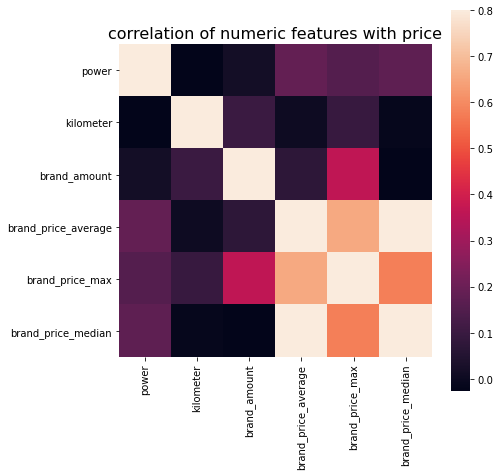

In [191]:
f , ax = plt.subplots(figsize=(7,7))
plt.title('correlation of numeric features with price',y=1,size=16)
sns.heatmap(correlation,square=True,vmax=0.8)

In [192]:
import time
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression

In [193]:
time1 = time.time()
time.sleep(5)
time2 = time.time()
print(time2-time1)

5.0006303787231445


In [194]:
x.loc[x['city'] == ''] = 0

NameError: name 'x' is not defined

#包裹式

In [ ]:
time1 = time.time()
sfs = SFS(LinearRegression(),
          k_features=10,
          forward=True,
          floating=False,
          scoring='r2',
          cv=0
         )
x = data.drop(['price'],axis=1)
x['city'] = pd.to_numeric(x['city'])
x = x.fillna(0)
x = x[x['train']==1]
y = data[data['train']==1]['price']
sfs.fit(x,y)
sfs.k_feature_names_
time2 = time.time()
print(time2-time1)

In [ ]:
sfs.k_feature_names_

In [ ]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt

fig1 = plot_sfs(sfs.get_metric_dict(),kind='std_dev')
plt.grid()
plt.show()

In [ ]:
#x['city'] = pd.to_numeric(x['city'])

In [ ]:
#x['city'].fillna(0,inplace=True)

In [ ]:
#x['city']

In [ ]:
x.info()

In [ ]:
#x.select_dtypes(include='object')

In [ ]:
#x.replace(x[x['city'] == '' ]['city'],0,inplace=True) 不管用

# 建模调参

In [195]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [196]:
def reduce_mem_usage(df):
    start_mem = df.memory_usage().sum()
    print('Memory usage of dataframe is {:.2f}MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')
            
    end_mem = df.memory_usage().sum()
    print('Memory usage after optimization is: {:.2f}MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    return df

In [197]:
data

,SaleID,name,power,kilometer,seller,offerType,price,v_0,v_1,v_2,...,power_bin_20.0,power_bin_21.0,power_bin_22.0,power_bin_23.0,power_bin_24.0,power_bin_25.0,power_bin_26.0,power_bin_27.0,power_bin_28.0,power_bin_29.0
0,0,736,0.416785,0.827586,0,0,1850.0,43.357796,3.966344,0.050257,...,0,0,0,0,0,0,0,0,0,0
1,1,2262,0.000000,1.000000,0,0,3600.0,45.305273,5.236112,0.137925,...,0,0,0,0,0,0,0,0,0,0
2,2,14874,0.517055,0.827586,0,0,6222.0,45.978359,4.823792,1.319524,...,0,0,0,0,0,0,0,0,0,0
3,3,71865,0.534087,1.000000,0,0,2400.0,45.687478,4.492574,-0.050616,...,0,0,0,0,0,0,0,0,0,0
4,4,111080,0.429279,0.310345,0,0,5200.0,44.383511,2.031433,0.572169,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199032,249995,111443,0.508682,1.000000,0,0,NaN,46.321013,-3.304401,0.073363,...,0,0,0,0,0,0,0,0,0,0
199033,249996,152834,0.526493,0.241379,0,0,NaN,48.086547,-3.318641,0.965881,...,0,0,0,0,0,0,0,0,0,0
199034,249997,132531,0.506648,0.827586,0,0,NaN,46.145279,-3.305263,-0.015283,...,0,0,0,0,0,0,0,0,0,0
199035,249998,143405,0.524789,1.000000,0,0,NaN,45.507088,-3.197006,-1.141252,...,0,0,0,0,0,0,0,0,0,0


In [198]:
reduce_mem_usage(data)

Memory usage of dataframe is 119820274.00MB
Memory usage after optimization is: 149278122.00MB
Decreased by -24.6%


,SaleID,name,power,kilometer,seller,offerType,price,v_0,v_1,v_2,...,power_bin_20.0,power_bin_21.0,power_bin_22.0,power_bin_23.0,power_bin_24.0,power_bin_25.0,power_bin_26.0,power_bin_27.0,power_bin_28.0,power_bin_29.0
0,0,736,0.416748,0.827637,0,0,1850.0,43.34375,3.966797,0.050262,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,2262,0.000000,1.000000,0,0,3600.0,45.31250,5.234375,0.137939,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,14874,0.517090,0.827637,0,0,6222.0,45.96875,4.824219,1.319336,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,71865,0.534180,1.000000,0,0,2400.0,45.68750,4.492188,-0.050629,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,111080,0.429199,0.310303,0,0,5200.0,44.37500,2.031250,0.572266,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199032,249995,111443,0.508789,1.000000,0,0,NaN,46.31250,-3.304688,0.073364,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
199033,249996,152834,0.526367,0.241333,0,0,NaN,48.09375,-3.318359,0.965820,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
199034,249997,132531,0.506836,0.827637,0,0,NaN,46.15625,-3.304688,-0.015282,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
199035,249998,143405,0.524902,1.000000,0,0,NaN,45.50000,-3.197266,-1.141602,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [199]:
path = 'D:/data analysis/天池-二手车/'
train_data = pd.read_csv(path+'used_car_train_20200313.csv',sep=' ')
test_data = pd.read_csv(path+'used_car_testB_20200421.csv',sep= ' ')

In [200]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 31 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   SaleID             150000 non-null  int64  
 1   name               150000 non-null  int64  
 2   regDate            150000 non-null  int64  
 3   model              149999 non-null  float64
 4   brand              150000 non-null  int64  
 5   bodyType           145494 non-null  float64
 6   fuelType           141320 non-null  float64
 7   gearbox            144019 non-null  float64
 8   power              150000 non-null  int64  
 9   kilometer          150000 non-null  float64
 10  notRepairedDamage  150000 non-null  object 
 11  regionCode         150000 non-null  int64  
 12  seller             150000 non-null  int64  
 13  offerType          150000 non-null  int64  
 14  creatDate          150000 non-null  int64  
 15  price              150000 non-null  int64  
 16  v_

In [201]:
reduce_mem_usage(train_data)

Memory usage of dataframe is 37200128.00MB
Memory usage after optimization is: 10200260.00MB
Decreased by 72.6%


,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
0,0,736,20040402,30.0,6,1.0,0.0,0.0,60,12.5,...,0.235718,0.101990,0.129517,0.022812,0.097473,-2.880859,2.804688,-2.419922,0.795410,0.914551
1,1,2262,20030301,40.0,1,2.0,0.0,0.0,0,15.0,...,0.264893,0.121033,0.135742,0.026596,0.020584,-4.902344,2.095703,-1.030273,-1.722656,0.245483
2,2,14874,20040403,115.0,15,1.0,0.0,0.0,163,12.5,...,0.251465,0.114929,0.165161,0.062164,0.027069,-4.847656,1.803711,1.565430,-0.832520,-0.229980
3,3,71865,19960908,109.0,10,0.0,0.0,1.0,193,15.0,...,0.274414,0.110291,0.121948,0.033386,0.000000,-4.507812,1.286133,-0.501953,-2.437500,-0.478760
4,4,111080,20120103,110.0,5,1.0,0.0,0.0,68,5.0,...,0.228027,0.073181,0.091858,0.078796,0.121521,-1.896484,0.910645,0.931152,2.833984,1.923828
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,149995,163978,20000607,121.0,10,4.0,0.0,1.0,163,15.0,...,0.280273,0.000310,0.048431,0.071167,0.019180,1.988281,-2.984375,0.589355,-1.304688,-0.302490
149996,149996,184535,20091102,116.0,11,0.0,0.0,0.0,125,10.0,...,0.253174,0.000777,0.084106,0.099670,0.079346,1.838867,-2.775391,2.554688,0.924316,-0.272217
149997,149997,147587,20101003,60.0,11,1.0,1.0,0.0,90,6.0,...,0.233398,0.000705,0.118896,0.100098,0.097900,2.439453,-1.630859,2.291016,1.891602,0.415039
149998,149998,45907,20060312,34.0,10,3.0,1.0,0.0,156,15.0,...,0.256348,0.000252,0.081482,0.083557,0.081482,2.076172,-2.632812,1.415039,0.431885,-1.659180


In [202]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 31 columns):
 #   Column             Non-Null Count   Dtype   
---  ------             --------------   -----   
 0   SaleID             150000 non-null  int32   
 1   name               150000 non-null  int32   
 2   regDate            150000 non-null  int32   
 3   model              149999 non-null  float16 
 4   brand              150000 non-null  int8    
 5   bodyType           145494 non-null  float16 
 6   fuelType           141320 non-null  float16 
 7   gearbox            144019 non-null  float16 
 8   power              150000 non-null  int16   
 9   kilometer          150000 non-null  float16 
 10  notRepairedDamage  150000 non-null  category
 11  regionCode         150000 non-null  int16   
 12  seller             150000 non-null  int8    
 13  offerType          150000 non-null  int8    
 14  creatDate          150000 non-null  int32   
 15  price              150000 non-null

In [203]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199037 entries, 0 to 199036
Columns: 370 entries, SaleID to power_bin_29.0
dtypes: category(1), float16(363), float32(1), int32(2), int8(3)
memory usage: 142.4 MB


In [204]:
#np.iinfo(np.int8)

In [205]:
sample_feature = reduce_mem_usage(pd.read_csv('data_for_tree.csv'))

Memory usage of dataframe is 62099672.00MB
Memory usage after optimization is: 16520331.00MB
Decreased by 73.4%


In [206]:
sample_feature.head()

,SaleID,name,model,brand,bodyType,fuelType,gearbox,power,kilometer,notRepairedDamage,...,used_time,city,brand_amount,brand_price_max,brand_price_median,brand_price_min,brand_price_sum,brand_price_std,brand_price_average,power_bin
0,0,736,30.0,6,1.0,0.0,0.0,60,12.5,0.0,...,4384.0,1.0,10192.0,35990.0,1800.0,13.0,36457520.0,4564.0,3576.0,5.0
1,1,2262,40.0,1,2.0,0.0,0.0,0,15.0,-,...,4756.0,4.0,13656.0,84000.0,6400.0,15.0,124044600.0,8992.0,9080.0,NaN
2,2,14874,115.0,15,1.0,0.0,0.0,163,12.5,0.0,...,4384.0,2.0,1458.0,45000.0,8496.0,100.0,14373814.0,5424.0,9848.0,16.0
3,3,71865,109.0,10,0.0,0.0,1.0,193,15.0,0.0,...,7124.0,NaN,13992.0,92900.0,5200.0,15.0,113034208.0,8248.0,8076.0,19.0
4,4,111080,110.0,5,1.0,0.0,0.0,68,5.0,0.0,...,1531.0,6.0,4664.0,31500.0,2300.0,20.0,15414322.0,3344.0,3306.0,6.0


In [207]:
continuous_feature_names = [x for x in sample_feature.columns if x not in ['price','brand','model']]

In [208]:
continuous_feature_names

['SaleID',
 'name',
 'bodyType',
 'fuelType',
 'gearbox',
 'power',
 'kilometer',
 'notRepairedDamage',
 'seller',
 'offerType',
 'v_0',
 'v_1',
 'v_2',
 'v_3',
 'v_4',
 'v_5',
 'v_6',
 'v_7',
 'v_8',
 'v_9',
 'v_10',
 'v_11',
 'v_12',
 'v_13',
 'v_14',
 'train',
 'used_time',
 'city',
 'brand_amount',
 'brand_price_max',
 'brand_price_median',
 'brand_price_min',
 'brand_price_sum',
 'brand_price_std',
 'brand_price_average',
 'power_bin']

In [209]:
sample_feature

,SaleID,name,model,brand,bodyType,fuelType,gearbox,power,kilometer,notRepairedDamage,...,used_time,city,brand_amount,brand_price_max,brand_price_median,brand_price_min,brand_price_sum,brand_price_std,brand_price_average,power_bin
0,0,736,30.0,6,1.0,0.0,0.0,60,12.5,0.0,...,4384.0,1.0,10192.0,35990.0,1800.0,13.0,36457520.0,4564.0,3576.0,5.0
1,1,2262,40.0,1,2.0,0.0,0.0,0,15.0,-,...,4756.0,4.0,13656.0,84000.0,6400.0,15.0,124044600.0,8992.0,9080.0,NaN
2,2,14874,115.0,15,1.0,0.0,0.0,163,12.5,0.0,...,4384.0,2.0,1458.0,45000.0,8496.0,100.0,14373814.0,5424.0,9848.0,16.0
3,3,71865,109.0,10,0.0,0.0,1.0,193,15.0,0.0,...,7124.0,NaN,13992.0,92900.0,5200.0,15.0,113034208.0,8248.0,8076.0,19.0
4,4,111080,110.0,5,1.0,0.0,0.0,68,5.0,0.0,...,1531.0,6.0,4664.0,31500.0,2300.0,20.0,15414322.0,3344.0,3306.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199032,249995,111443,4.0,4,0.0,NaN,1.0,150,15.0,-,...,4172.0,5.0,16576.0,99999.0,6000.0,12.0,138279072.0,8088.0,8344.0,14.0
199033,249996,152834,65.0,1,0.0,0.0,0.0,179,4.0,0.0,...,1079.0,5.0,13656.0,84000.0,6400.0,15.0,124044600.0,8992.0,9080.0,17.0
199034,249997,132531,4.0,4,0.0,0.0,1.0,147,12.5,0.0,...,4112.0,3.0,16576.0,99999.0,6000.0,12.0,138279072.0,8088.0,8344.0,14.0
199035,249998,143405,40.0,1,4.0,0.0,1.0,176,15.0,0.0,...,5016.0,NaN,13656.0,84000.0,6400.0,15.0,124044600.0,8992.0,9080.0,17.0


In [210]:
sample_feature = sample_feature.dropna().replace('-',0).reset_index(drop = True)
sample_feature

,SaleID,name,model,brand,bodyType,fuelType,gearbox,power,kilometer,notRepairedDamage,...,used_time,city,brand_amount,brand_price_max,brand_price_median,brand_price_min,brand_price_sum,brand_price_std,brand_price_average,power_bin
0,0,736,30.0,6,1.0,0.0,0.0,60,12.5,0.0,...,4384.0,1.0,10192.0,35990.0,1800.0,13.0,36457520.0,4564.0,3576.0,5.0
1,2,14874,115.0,15,1.0,0.0,0.0,163,12.5,0.0,...,4384.0,2.0,1458.0,45000.0,8496.0,100.0,14373814.0,5424.0,9848.0,16.0
2,4,111080,110.0,5,1.0,0.0,0.0,68,5.0,0.0,...,1531.0,6.0,4664.0,31500.0,2300.0,20.0,15414322.0,3344.0,3306.0,6.0
3,5,137642,24.0,10,0.0,1.0,0.0,109,10.0,0.0,...,2482.0,3.0,13992.0,92900.0,5200.0,15.0,113034208.0,8248.0,8076.0,10.0
4,6,2402,13.0,4,0.0,0.0,1.0,150,15.0,0.0,...,6184.0,3.0,16576.0,99999.0,6000.0,12.0,138279072.0,8088.0,8344.0,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91724,149994,43073,42.0,1,1.0,0.0,0.0,122,3.0,0.0,...,1538.0,5.0,13656.0,84000.0,6400.0,15.0,124044600.0,8992.0,9080.0,12.0
91725,149995,163978,121.0,10,4.0,0.0,1.0,163,15.0,0.0,...,5772.0,4.0,13992.0,92900.0,5200.0,15.0,113034208.0,8248.0,8076.0,16.0
91726,149996,184535,116.0,11,0.0,0.0,0.0,125,10.0,0.0,...,2322.0,2.0,2944.0,34500.0,2900.0,30.0,13398006.0,4724.0,4548.0,12.0
91727,149997,147587,60.0,11,1.0,1.0,0.0,90,6.0,0.0,...,2003.0,3.0,2944.0,34500.0,2900.0,30.0,13398006.0,4724.0,4548.0,8.0


In [211]:
sample_feature['notRepairedDamage']

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
91724    0.0
91725    0.0
91726    0.0
91727    0.0
91728    0.0
Name: notRepairedDamage, Length: 91729, dtype: category
Categories (3, object): [0, '0.0', '1.0']

In [212]:
sample_feature['notRepairedDamage'] = sample_feature['notRepairedDamage'].astype(np.float32)
train = sample_feature[continuous_feature_names + ['price']]

In [213]:
train_X = train[continuous_feature_names]
train_Y = train['price']

In [214]:
from sklearn.linear_model import LinearRegression

In [215]:
model = LinearRegression(normalize=True)
model = model.fit(train_X,train_Y)

In [216]:
model.intercept_

-110670.68277206102

In [217]:
'intercept' + str(model.intercept_)

'intercept-110670.68277206102'

In [218]:
sorted(dict(zip(continuous_feature_names,model.coef_)).items(),key=lambda x:x[1],reverse=True)

[('v_6', 3367064.3416418834),
 ('v_8', 700675.5609399438),
 ('v_9', 170630.2772322803),
 ('v_7', 32322.6619320714),
 ('v_12', 20473.67079697904),
 ('v_3', 17868.07954150027),
 ('v_11', 11474.938996731968),
 ('v_13', 11261.764560013553),
 ('v_10', 2683.9200905906805),
 ('gearbox', 881.8225039250468),
 ('fuelType', 363.9042507215828),
 ('bodyType', 189.60271012073036),
 ('city', 44.94975120522288),
 ('power', 28.553901616756015),
 ('brand_price_median', 0.5103728134078919),
 ('brand_price_std', 0.4503634709263121),
 ('brand_amount', 0.1488112039506784),
 ('brand_price_max', 0.0031910186703171264),
 ('SaleID', 5.3559899198596056e-05),
 ('seller', 9.899085853248835e-07),
 ('train', -3.7439167499542236e-07),
 ('offerType', -1.41095370054245e-06),
 ('brand_price_sum', -2.1750068681880472e-05),
 ('name', -0.00029800127130340216),
 ('used_time', -0.0025158943328794556),
 ('brand_price_average', -0.40490484510115665),
 ('brand_price_min', -2.2467753486890922),
 ('power_bin', -34.420644117317565

In [219]:
model.coef_

array([ 5.35598992e-05, -2.98001271e-04,  1.89602710e+02,  3.63904251e+02,
        8.81822504e+02,  2.85539016e+01, -3.72897527e+02, -4.95190384e+02,
        9.89908585e-07, -1.41095370e-06, -2.04505496e+03, -4.55561893e+04,
       -2.60982999e+04,  1.78680795e+04, -1.51217311e+04, -1.10229862e+04,
        3.36706434e+06,  3.23226619e+04,  7.00675561e+05,  1.70630277e+05,
        2.68392009e+03,  1.14749390e+04,  2.04736708e+04,  1.12617646e+04,
       -2.74784118e+02, -3.74391675e-07, -2.51589433e-03,  4.49497512e+01,
        1.48811204e-01,  3.19101867e-03,  5.10372813e-01, -2.24677535e+00,
       -2.17500687e-05,  4.50363471e-01, -4.04904845e-01, -3.44206441e+01])

In [220]:
dict(zip(continuous_feature_names,model.coef_))

{'SaleID': 5.3559899198596056e-05,
 'name': -0.00029800127130340216,
 'bodyType': 189.60271012073036,
 'fuelType': 363.9042507215828,
 'gearbox': 881.8225039250468,
 'power': 28.553901616756015,
 'kilometer': -372.8975266607198,
 'notRepairedDamage': -495.19038446287044,
 'seller': 9.899085853248835e-07,
 'offerType': -1.41095370054245e-06,
 'v_0': -2045.0549573525166,
 'v_1': -45556.1892972867,
 'v_2': -26098.29992055721,
 'v_3': 17868.07954150027,
 'v_4': -15121.7311098557,
 'v_5': -11022.986240324151,
 'v_6': 3367064.3416418834,
 'v_7': 32322.6619320714,
 'v_8': 700675.5609399438,
 'v_9': 170630.2772322803,
 'v_10': 2683.9200905906805,
 'v_11': 11474.938996731968,
 'v_12': 20473.67079697904,
 'v_13': 11261.764560013553,
 'v_14': -274.78411807746403,
 'train': -3.7439167499542236e-07,
 'used_time': -0.0025158943328794556,
 'city': 44.94975120522288,
 'brand_amount': 0.1488112039506784,
 'brand_price_max': 0.0031910186703171264,
 'brand_price_median': 0.5103728134078919,
 'brand_price

In [221]:
from matplotlib import pyplot as plt

In [222]:
subsample_index = np.random.randint(low=0,high=len(train_Y),size=50)

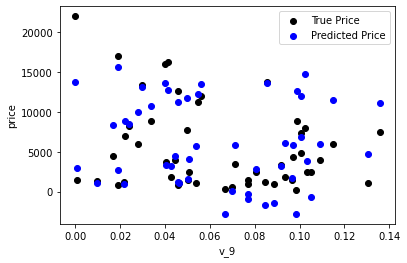

In [223]:
plt.scatter(train_X['v_9'][subsample_index],train_Y[subsample_index],color='black')
plt.scatter(train_X['v_9'][subsample_index],model.predict(train_X.loc[subsample_index]),color='blue')
plt.xlabel('v_9')
plt.ylabel('price')
plt.legend(['True Price','Predicted Price'],loc = 'upper right')
plt.show()

<AxesSubplot:xlabel='price', ylabel='Density'>

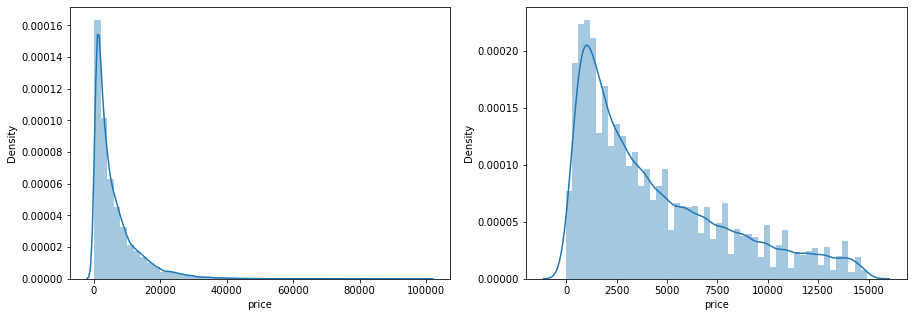

In [224]:
import seaborn as sns
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.distplot(train_Y)
plt.subplot(1,2,2)
sns.distplot(train_Y[train_Y < np.quantile(train_Y,0.9)])

In [225]:
train_Y_ln = np.log(train_Y+1)

<AxesSubplot:xlabel='price', ylabel='Density'>

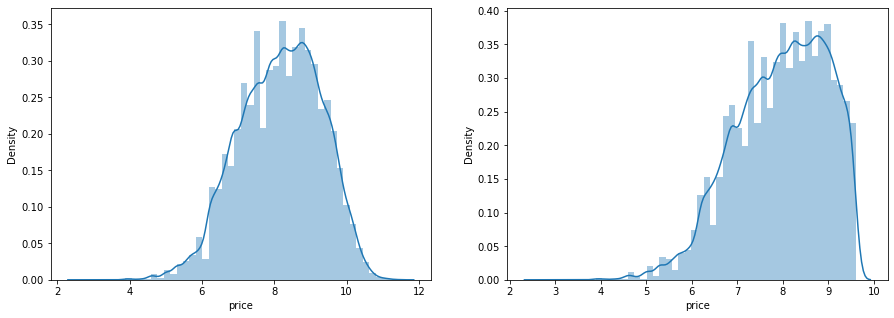

In [226]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.distplot(train_Y_ln)
plt.subplot(1,2,2)
sns.distplot(train_Y_ln[train_Y_ln<np.quantile(train_Y_ln,0.9)])

In [227]:
model = model.fit(train_X,train_Y_ln)
print('intercept'+str(model.intercept_))
sorted(dict(zip(continuous_feature_names,model.coef_)).items(),key=lambda x:x[1],reverse=True)

intercept18.75074546008539


[('v_9', 8.052411927756685),
 ('v_5', 5.764248502264528),
 ('v_12', 1.618206674468192),
 ('v_1', 1.4798302934387586),
 ('v_11', 1.1669014496947667),
 ('v_13', 0.9404706038642807),
 ('v_7', 0.7137295307879391),
 ('v_3', 0.6837865320326174),
 ('v_0', 0.00850052523851638),
 ('power_bin', 0.008497967226213998),
 ('gearbox', 0.007922377819950805),
 ('fuelType', 0.006684768278650758),
 ('bodyType', 0.004523520659141523),
 ('power', 0.0007161896117534146),
 ('brand_price_min', 3.334353082746788e-05),
 ('brand_amount', 2.8978800102532996e-06),
 ('brand_price_median', 1.257111999661268e-06),
 ('brand_price_std', 6.659134278542709e-07),
 ('brand_price_max', 6.194957240891586e-07),
 ('brand_price_average', 5.99942948919461e-07),
 ('SaleID', 2.119416206654906e-08),
 ('seller', 1.74386727280762e-10),
 ('train', 1.7053025658242404e-12),
 ('offerType', -7.105427357601002e-12),
 ('brand_price_sum', -1.512651044579758e-10),
 ('name', -7.015510649970943e-08),
 ('used_time', -4.122477171058269e-06),
 ('c

The predicted price seems normal after np.log transforming


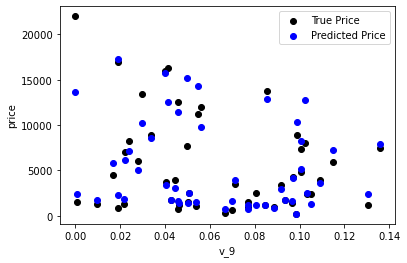

In [228]:
plt.scatter(train_X['v_9'][subsample_index],train_Y[subsample_index],color='black')
plt.scatter(train_X['v_9'][subsample_index],np.exp(model.predict(train_X.loc[subsample_index])),color='blue')
plt.xlabel('v_9')
plt.ylabel('price')
plt.legend(['True Price','Predicted Price'],loc='upper right')
print('The predicted price seems normal after np.log transforming')
plt.show()

The predicted price seems normal after np.log transforming


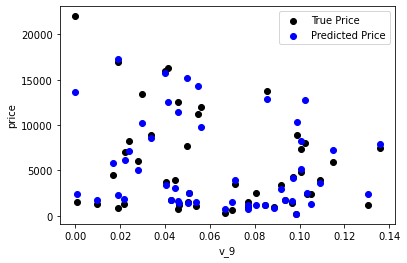

In [229]:
plt.scatter(train_X['v_9'][subsample_index],train_Y[subsample_index],color='black')
plt.scatter(train_X['v_9'][subsample_index],np.exp(model.predict(train_X.loc[subsample_index]))-1,color='blue')
plt.xlabel('v_9')
plt.ylabel('price')
plt.legend(['True Price','Predicted Price'],loc='upper right')
print('The predicted price seems normal after np.log transforming')
plt.show()

In [230]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error,make_scorer

In [231]:
def log_transfer(func):
    def wrapper(y,yhat):
        result = func(np.log(y),np.nan_to_num(np.log(yhat)))
        return result
    return wrapper

In [232]:
log_transfer(mean_absolute_error)

<function __main__.log_transfer.<locals>.wrapper(y, yhat)>

In [233]:
scores = cross_val_score(model,X=train_X,y=train_Y,verbose=1,cv=5,scoring=make_scorer(log_transfer(mean_absolute_error)))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.6s finished


In [234]:
scores

array([1.34830381, 1.36349009, 1.38071245, 1.37840115, 1.35810453])

In [235]:
print('AVG:',np.mean(scores))

AVG: 1.3658024042407906


In [236]:
scores = cross_val_score(model, X=train_X, y=train_Y_ln, verbose=1, cv = 5, scoring=make_scorer(mean_absolute_error))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.6s finished


In [237]:
print('AVG:',np.mean(scores))

AVG: 0.19325301535176903


In [238]:
scores = pd.DataFrame(scores.reshape(1,-1))
scores.columns = ['cv' + str(x) for x in range(1,6)]
scores.index = ['MAE']
scores

,cv1,cv2,cv3,cv4,cv5
MAE,0.190792,0.193758,0.194132,0.191825,0.195758


In [239]:
import datetime

In [240]:
sample_feature

,SaleID,name,model,brand,bodyType,fuelType,gearbox,power,kilometer,notRepairedDamage,...,used_time,city,brand_amount,brand_price_max,brand_price_median,brand_price_min,brand_price_sum,brand_price_std,brand_price_average,power_bin
0,0,736,30.0,6,1.0,0.0,0.0,60,12.5,0.0,...,4384.0,1.0,10192.0,35990.0,1800.0,13.0,36457520.0,4564.0,3576.0,5.0
1,2,14874,115.0,15,1.0,0.0,0.0,163,12.5,0.0,...,4384.0,2.0,1458.0,45000.0,8496.0,100.0,14373814.0,5424.0,9848.0,16.0
2,4,111080,110.0,5,1.0,0.0,0.0,68,5.0,0.0,...,1531.0,6.0,4664.0,31500.0,2300.0,20.0,15414322.0,3344.0,3306.0,6.0
3,5,137642,24.0,10,0.0,1.0,0.0,109,10.0,0.0,...,2482.0,3.0,13992.0,92900.0,5200.0,15.0,113034208.0,8248.0,8076.0,10.0
4,6,2402,13.0,4,0.0,0.0,1.0,150,15.0,0.0,...,6184.0,3.0,16576.0,99999.0,6000.0,12.0,138279072.0,8088.0,8344.0,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91724,149994,43073,42.0,1,1.0,0.0,0.0,122,3.0,0.0,...,1538.0,5.0,13656.0,84000.0,6400.0,15.0,124044600.0,8992.0,9080.0,12.0
91725,149995,163978,121.0,10,4.0,0.0,1.0,163,15.0,0.0,...,5772.0,4.0,13992.0,92900.0,5200.0,15.0,113034208.0,8248.0,8076.0,16.0
91726,149996,184535,116.0,11,0.0,0.0,0.0,125,10.0,0.0,...,2322.0,2.0,2944.0,34500.0,2900.0,30.0,13398006.0,4724.0,4548.0,12.0
91727,149997,147587,60.0,11,1.0,1.0,0.0,90,6.0,0.0,...,2003.0,3.0,2944.0,34500.0,2900.0,30.0,13398006.0,4724.0,4548.0,8.0


In [241]:
sample_feature = sample_feature.reset_index(drop=True)
sample_feature

,SaleID,name,model,brand,bodyType,fuelType,gearbox,power,kilometer,notRepairedDamage,...,used_time,city,brand_amount,brand_price_max,brand_price_median,brand_price_min,brand_price_sum,brand_price_std,brand_price_average,power_bin
0,0,736,30.0,6,1.0,0.0,0.0,60,12.5,0.0,...,4384.0,1.0,10192.0,35990.0,1800.0,13.0,36457520.0,4564.0,3576.0,5.0
1,2,14874,115.0,15,1.0,0.0,0.0,163,12.5,0.0,...,4384.0,2.0,1458.0,45000.0,8496.0,100.0,14373814.0,5424.0,9848.0,16.0
2,4,111080,110.0,5,1.0,0.0,0.0,68,5.0,0.0,...,1531.0,6.0,4664.0,31500.0,2300.0,20.0,15414322.0,3344.0,3306.0,6.0
3,5,137642,24.0,10,0.0,1.0,0.0,109,10.0,0.0,...,2482.0,3.0,13992.0,92900.0,5200.0,15.0,113034208.0,8248.0,8076.0,10.0
4,6,2402,13.0,4,0.0,0.0,1.0,150,15.0,0.0,...,6184.0,3.0,16576.0,99999.0,6000.0,12.0,138279072.0,8088.0,8344.0,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91724,149994,43073,42.0,1,1.0,0.0,0.0,122,3.0,0.0,...,1538.0,5.0,13656.0,84000.0,6400.0,15.0,124044600.0,8992.0,9080.0,12.0
91725,149995,163978,121.0,10,4.0,0.0,1.0,163,15.0,0.0,...,5772.0,4.0,13992.0,92900.0,5200.0,15.0,113034208.0,8248.0,8076.0,16.0
91726,149996,184535,116.0,11,0.0,0.0,0.0,125,10.0,0.0,...,2322.0,2.0,2944.0,34500.0,2900.0,30.0,13398006.0,4724.0,4548.0,12.0
91727,149997,147587,60.0,11,1.0,1.0,0.0,90,6.0,0.0,...,2003.0,3.0,2944.0,34500.0,2900.0,30.0,13398006.0,4724.0,4548.0,8.0


In [242]:
split_point = len(sample_feature) //5 * 4

In [243]:
continuous_feature_names

['SaleID',
 'name',
 'bodyType',
 'fuelType',
 'gearbox',
 'power',
 'kilometer',
 'notRepairedDamage',
 'seller',
 'offerType',
 'v_0',
 'v_1',
 'v_2',
 'v_3',
 'v_4',
 'v_5',
 'v_6',
 'v_7',
 'v_8',
 'v_9',
 'v_10',
 'v_11',
 'v_12',
 'v_13',
 'v_14',
 'train',
 'used_time',
 'city',
 'brand_amount',
 'brand_price_max',
 'brand_price_median',
 'brand_price_min',
 'brand_price_sum',
 'brand_price_std',
 'brand_price_average',
 'power_bin']

In [244]:
train = sample_feature.loc[:split_point].dropna()
val = sample_feature.loc[split_point:].dropna()

train_X = train[continuous_feature_names]
train_Y_ln = np.log(train['price'] + 1)
val_X = val[continuous_feature_names]
val_Y_ln = np.log(val['price'] + 1)

In [245]:
model = model.fit(train_X,train_Y_ln)

In [246]:
mean_absolute_error(val_Y_ln,model.predict(val_X))

0.19577667040507393

In [247]:
from sklearn.model_selection import learning_curve,validation_curve

In [518]:
?learning_curve

In [248]:
def plot_learning_curve(estimator,title,X,y,ylim=None,cv=None,n_jobs=1,train_size=np.linspace(0.1,1.0,5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel('Training example')
    plt.ylabel('score')
    train_sizes,train_scores,test_scores = learning_curve(estimator,X,y,cv=cv,n_jobs=n_jobs,train_sizes=train_size,scoring=make_scorer(mean_absolute_error))
    train_scores_mean = np.mean(train_scores,axis=1)
    train_scores_std = np.std(train_scores,axis=1)
    test_scores_mean = np.mean(test_scores,axis=1)
    test_scores_std = np.std(test_scores,axis=1)
    plt.grid()
    plt.fill_between(train_sizes,train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std,alpha=0.1,color='r'
                    )
    plt.fill_between(train_sizes,test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std,alpha=0.1,color='g')
    plt.plot(train_sizes,train_scores_mean,'o-',color='r',label='training score')
    plt.plot(train_sizes,test_scores_mean,'o-',color='g',label='cross-validation score')
    plt.legend(loc='best')
    return plt

<module 'matplotlib.pyplot' from 'd:\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

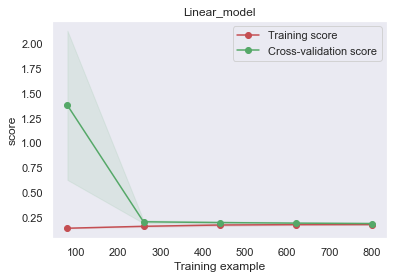

In [523]:
plot_learning_curve(LinearRegression(),'Linear_model',train_X[:1000],train_Y_ln[:1000],cv=5,n_jobs=1)

In [249]:
train = sample_feature[continuous_feature_names + ['price']].dropna()

train_X = train[continuous_feature_names]
train_y = train['price']
train_y_ln = np.log(train_y + 1)

In [250]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [251]:
models = [LinearRegression(),Ridge(),Lasso()]

In [252]:
result = dict()
for model in models:
    model_name = str(model).split('(')[0]
    scores = cross_val_score(model,X=train_X,y=train_y_ln,verbose=0,cv=5,scoring=make_scorer(mean_absolute_error))
    result[model_name] = scores

In [253]:
result = pd.DataFrame(result)
result.index = ['cv' + str(x) for x in range(1,6)]
result

,LinearRegression,Ridge,Lasso
cv1,0.190792,0.194832,0.383899
cv2,0.193758,0.197632,0.381893
cv3,0.194132,0.198123,0.384090
cv4,0.191825,0.195670,0.380526
cv5,0.195758,0.199676,0.383611


intercept:18.750714636474434


<AxesSubplot:>

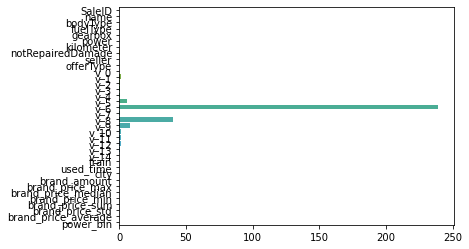

In [254]:
model = LinearRegression().fit(train_X,train_y_ln)
print('intercept:' + str(model.intercept_))
sns.barplot(abs(model.coef_),continuous_feature_names)

intercept:4.671710857129076


<AxesSubplot:>

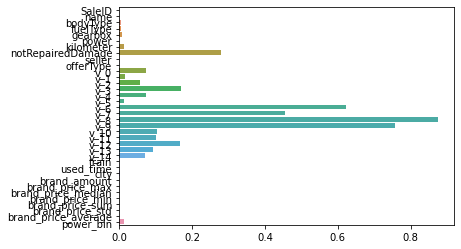

In [255]:
model = Ridge().fit(train_X, train_y_ln)
print('intercept:'+ str(model.intercept_))
sns.barplot(abs(model.coef_), continuous_feature_names)

intercept:8.672182455497687


<AxesSubplot:>

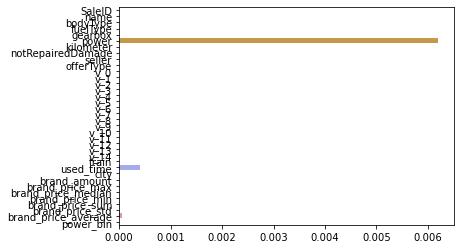

In [256]:
model = Lasso().fit(train_X, train_y_ln)
print('intercept:'+ str(model.intercept_))
sns.barplot(abs(model.coef_), continuous_feature_names)

In [257]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from xgboost.sklearn import XGBRegressor
from lightgbm.sklearn import LGBMRegressor

In [258]:
models = [LinearRegression()
         ,DecisionTreeRegressor()
         ,RandomForestRegressor()
         ,GradientBoostingRegressor()
         ,MLPRegressor(solver='lbfgs',max_iter=100)
         ,XGBRegressor(n_estimators=100,objective='reg:squarederror')
         ,LGBMRegressor(n_estimators=100)]

In [259]:
result = dict()
for model in models:
    model_name = str(model).split('(')[0]
    scores = cross_val_score(model, X=train_X, y=train_y_ln, verbose=0, cv = 5, scoring=make_scorer(mean_absolute_error))
    result[model_name] = scores
    print(model_name + ' is finished')

LinearRegression is finished
DecisionTreeRegressor is finished


KeyboardInterrupt: 

In [262]:
train_X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91729 entries, 0 to 91728
Data columns (total 36 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   SaleID               91729 non-null  int32  
 1   name                 91729 non-null  int32  
 2   bodyType             91729 non-null  float16
 3   fuelType             91729 non-null  float16
 4   gearbox              91729 non-null  float16
 5   power                91729 non-null  int16  
 6   kilometer            91729 non-null  float16
 7   notRepairedDamage    91729 non-null  float32
 8   seller               91729 non-null  int8   
 9   offerType            91729 non-null  int8   
 10  v_0                  91729 non-null  float16
 11  v_1                  91729 non-null  float16
 12  v_2                  91729 non-null  float16
 13  v_3                  91729 non-null  float16
 14  v_4                  91729 non-null  float16
 15  v_5                  91729 non-null 

In [260]:
train_y_ln

0        7.523481
1        8.736008
2        8.556606
3        8.987322
4        8.160804
           ...   
91724    9.601098
91725    8.682878
91726    9.159152
91727    8.922791
91728    8.517193
Name: price, Length: 91729, dtype: float32

In [ ]:
result = pd.DataFrame(result)
result.index = ['cv' + str(x) for x in range(1,6)]
result

In [ ]:
objective = ['regression','regression_l1','mape','huber','fair']

num_leaves = [3,5,10,15,29,40,55]
max_depth = [3,5,10,15,20,40,55]
bagging_fraction = []
feature_fraction = []
drop_rate = []

In [ ]:
best_obj = dict()
for obj in objective:
    model = LGBMRegressor(objective=obj)
    score = np.mean(cross_val_score(model,X=train_X,y=train_y_ln,verbose=0,cv=5,scoring=make_scorer(mean_absolute_error)))
    best_obj[obj] = score

In [549]:
best_obj.items()

dict_items([('regression', 0.14365599758516648), ('regression_l1', 0.142368724430397), ('mape', 0.14311170224329464), ('huber', 0.1428918141792807), ('fair', 0.1439317107401011)])

In [551]:
min(best_obj.items(),key=lambda x:x[1])[0]

'regression_l1'

In [552]:
best_leaves = dict()
for leaves in num_leaves:
    model = LGBMRegressor(objective=min(best_obj.items(),key=lambda x:x[1])[0],num_leaves=leaves)
    score = np.mean(cross_val_score(model,X=train_X,y=train_y_ln,verbose=0,cv=5,scoring=make_scorer(mean_absolute_error)))
    best_leaves[leaves] = score

In [559]:
min(best_leaves.items(),key = lambda x:x[1])[0]

55

In [553]:
best_depth = dict()
for depth in max_depth:
    model = LGBMRegressor(objective=min(best_obj.items(),key=lambda x:x[1])[0],
                          num_leaves = min(best_leaves.items(),key = lambda x:x[1])[0],
                          max_depth=depth)
    score = np.mean(cross_val_score(model,X=train_X,y=train_y_ln,verbose=0,cv=5,scoring=make_scorer(mean_absolute_error)))
    best_depth[depth] = score

In [560]:
min(best_depth.items(),key = lambda x:x[1])[0]

20

<AxesSubplot:>

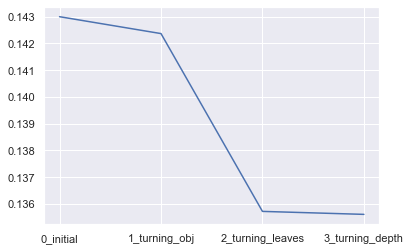

In [554]:
sns.lineplot(x=['0_initial','1_turning_obj','2_turning_leaves','3_turning_depth'],y=[0.143,min(best_obj.values()),min(best_leaves.values()),min(best_depth.values())])

In [555]:
from sklearn.model_selection import GridSearchCV

In [556]:
time_start = time.time()
parameters = {'objective': objective, 'num_leaves': num_leaves, 'max_depth': max_depth}
model = LGBMRegressor()
clf = GridSearchCV(model,parameters,cv=5)
clf = clf.fit(train_X,train_y)
time_end = time.time()
print(time_end-time_start)

1806.235062122345


In [557]:
clf.best_params_

{'max_depth': 15, 'num_leaves': 55, 'objective': 'regression'}

In [561]:
model = LGBMRegressor(objective='regression',num_leaves=55,max_depth=15)

In [562]:
np.mean(cross_val_score(model,X=train_X,y=train_y_ln,verbose=0,cv=5,scoring=make_scorer(mean_absolute_error)))

0.13754832925624427

In [565]:
from bayes_opt import BayesianOptimization

In [575]:
mean_absolute_error

<function sklearn.metrics._regression.mean_absolute_error(y_true, y_pred, *, sample_weight=None, multioutput='uniform_average')>

In [585]:
def rf_cv(num_leaves,max_depth,subsample,min_child_samples):
    val = cross_val_score(
        LGBMRegressor(objective='regression_l1',
        num_leaves = int(num_leaves),
        max_depth = int(max_depth),
        subsample = subsample,
        min_child_samples = int(min_child_samples)
        ),
        X = train_X,y=train_y_ln,verbose=0,cv=5,scoring=make_scorer(mean_absolute_error)
    ).mean()
    return -val

In [586]:
rf_bo = BayesianOptimization(
rf_cv,
{
    'num_leaves':(2,100),
    'max_depth':(2,100),
    'subsample':(0.1,1),
    'min_child_samples':(2,100)
})

In [587]:
rf_bo.maximize()

|   iter    |  target   | max_depth | min_ch... | num_le... | subsample |
-------------------------------------------------------------------------
|  1        | -0.1727   |  19.88    |  52.0     |  6.261    |  0.1058   |
|  2        | -0.1342   |  97.14    |  84.86    |  64.9     |  0.2784   |
|  3        | -0.1387   |  74.73    |  81.59    |  41.41    |  0.1665   |
|  4        | -0.1323   |  66.97    |  92.2     |  80.26    |  0.9856   |
|  5        | -0.1315   |  98.2     |  81.64    |  89.88    |  0.7868   |
|  6        | -0.1342   |  95.92    |  84.81    |  64.08    |  0.7075   |
|  7        | -0.1308   |  100.0    |  2.0      |  100.0    |  1.0      |
|  8        | -0.1937   |  2.0      |  2.0      |  100.0    |  1.0      |
|  9        | -0.2281   |  100.0    |  2.0      |  2.0      |  1.0      |
|  10       | -0.1938   |  2.0      |  100.0    |  55.89    |  1.0      |
|  11       | -0.2281   |  100.0    |  100.0    |  2.0      |  1.0      |
|  12       | -0.1324   |  71.93    | 

In [593]:
 - rf_bo.max['target']

0.13056371190621746

In [594]:
import hyperopt
from hyperopt import hp,fmin,tpe,Trials,partial
from hyperopt.early_stop import no_progress_loss

In [595]:
print(hyperopt.__version__)

0.2.7


In [ ]:
def rf_cv(num_leaves,max_depth,subsample,min_child_samples):
    val = cross_val_score(
        LGBMRegressor(objective='regression_l1',
        num_leaves = int(num_leaves),
        max_depth = int(max_depth),
        subsample = subsample,
        min_child_samples = int(min_child_samples)
        ),
        X = train_X,y=train_y_ln,verbose=0,cv=5,scoring=make_scorer(mean_absolute_error)
    ).mean()
    return -val

In [ ]:
rf_bo = BayesianOptimization(
rf_cv,
{
    'num_leaves':(2,100),
    'max_depth':(2,100),
    'subsample':(0.1,1),
    'min_child_samples':(2,100)
})

In [608]:
def hyperopt_objective(params):
    reg = LGBMRegressor(objective = params['objective'],
                        n_estimators = int(params['n_estimators']),
                        num_leaves = int(params['num_leaves']),
                        max_depth = int(params['max_depth']),
                        subsample = params['subsample'],
                        min_child_samples = int(params['min_child_samples'])   
                       )
    val = cross_val_score(reg,
                          train_X,
                          train_y_ln,
                          verbose=0,
                          cv=5,
                          scoring=make_scorer(mean_absolute_error)
                         ).mean()
    return val

In [614]:
param_simple = {'objective': hp.choice('objective',['regression_l1','regression','huber','fair','mape']),
                'n_estimators': hp.quniform('n_estimators',2,100,1),
                'num_leaves': hp.quniform('num_leaves',2,100,1),
                'max_depth': hp.quniform('max_depth',2,100,1),
                'subsample': hp.uniform('subsample',0.1,1),
                'min_child_samples': hp.quniform('min_child_samples',2,100,1)
               }

In [610]:
def param_hyperopt(max_evals=100):
    trials = Trials()
    early_stop_fn = no_progress_loss(100)
    
    params_best = fmin(hyperopt_objective,
                       space = param_simple,
                       algo = tpe.suggest,
                       max_evals = max_evals,
                       verbose = True,
                       trials = trials,
                       early_stop_fn = early_stop_fn
                      )
    print('\n','\n','best params:',params_best,'\n')
    return params_best,trials

In [615]:
params_best , trials = param_hyperopt(30)

100%|███████████████████████████████████████████████| 30/30 [02:27<00:00,  4.92s/trial, best loss: 0.13131352072506383]

 
 best params: {'max_depth': 87.0, 'min_child_samples': 90.0, 'n_estimators': 98.0, 'num_leaves': 97.0, 'objective': 1, 'subsample': 0.9864000221156904} 



In [612]:
params_best , trials = param_hyperopt(100)

100%|█████████████████████████████████████████████| 100/100 [10:45<00:00,  6.46s/trial, best loss: 0.13142140228837237]

 
 best params: {'max_depth': 35.0, 'min_child_samples': 16.0, 'n_estimators': 99.0, 'num_leaves': 99.0, 'objective': 2, 'subsample': 0.34748540323401955} 



In [616]:
param_simple = {'objective': hp.choice('objective',['regression_l1']),
                'n_estimators': hp.quniform('n_estimators',90,130,1),
                'num_leaves': hp.quniform('num_leaves',90,130,1),
                'max_depth': hp.quniform('max_depth',2,50,1),
                'subsample': hp.uniform('subsample',0.1,1),
                'min_child_samples': hp.quniform('min_child_samples',2,100,1)
               }

In [617]:
params_best , trials = param_hyperopt(30)

100%|███████████████████████████████████████████████| 30/30 [04:38<00:00,  9.29s/trial, best loss: 0.12658042462411492]

 
 best params: {'max_depth': 16.0, 'min_child_samples': 63.0, 'n_estimators': 130.0, 'num_leaves': 128.0, 'objective': 0, 'subsample': 0.3292178712200753} 



In [618]:
params_best

{'max_depth': 16.0,
 'min_child_samples': 63.0,
 'n_estimators': 130.0,
 'num_leaves': 128.0,
 'objective': 0,
 'subsample': 0.3292178712200753}

# 模型融合

In [619]:
test_pre1 = [1.2,3.2,2.1,6.2]
test_pre2 = [0.9,3.1,2.0,5.9]
test_pre3 = [1.1,2.9,2.2,6.0]

y_test_true = [1,3,2,6]

In [620]:
import numpy as np
import pandas as pd

In [621]:
def Weighted_method(test_pre1,test_pre2,test_pre3,w=[1/3,1/3,1/3]):
    Weighted_result = w[0]*pd.Series(test_pre1)+w[1]*pd.Series(test_pre2)+w[2]*pd.Series(test_pre3)
    return Weighted_result

In [622]:
from sklearn import metrics
print('pre1 MAE:',metrics.mean_absolute_error(y_test_true,test_pre1))
print('pre2 MAE:',metrics.mean_absolute_error(y_test_true,test_pre2))
print('pre3 MAE:',metrics.mean_absolute_error(y_test_true,test_pre3))

pre1 MAE: 0.1750000000000001
pre2 MAE: 0.07499999999999993
pre3 MAE: 0.10000000000000009


In [627]:
w = [0.3,0.4,0.3]
Weighted_pre = Weighted_method(test_pre1,test_pre2,test_pre3)
metrics.mean_absolute_error(y_test_true,Weighted_pre)

0.0666666666666666

In [628]:
from sklearn import linear_model

In [632]:
def Stacking_method(train_reg1,train_reg2,train_reg3,y_train_true,test_pre1,test_pre2,test_pre3,model_L2=linear_model.LinearRegression()):
    model_L2.fit(pd.concat([pd.Series(train_reg1),pd.Series(train_reg2),pd.Series(train_reg3)],axis=1).values,y_train_true)
    Stacking_result = model_L2.predict(pd.concat([pd.Series(test_pre1),pd.Series(test_pre2),pd.Series(test_pre3)],axis=1).values)
    return Stacking_result

In [633]:
train_reg1 = [3.2,8.2,9.1,5.2]
train_reg2 = [2.9,8.1,9.0,4.9]
train_reg3 = [3.1,7.9,9.2,5.0]

y_train_true = [3,8,9,5]

test_pre1 = [1.2,3.2,2.1,6.2]
test_pre2 = [0.9,3.1,2.0,5.9]
test_pre3 = [1.1,2.9,2.2,6.0]

y_test_true = [1,3,2,6]

In [634]:
model_L2 = linear_model.LinearRegression()
Stacking_pre = Stacking_method(train_reg1,train_reg2,train_reg3,y_train_true,test_pre1,test_pre2,test_pre3,model_L2)
print('Stacking_pre MAE:', metrics.mean_absolute_error(y_test_true,Stacking_pre))

Stacking_pre MAE: 0.04213483146067404


In [10]:
from sklearn.datasets import make_blobs
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons
from sklearn.metrics import accuracy_score,roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
import warnings

In [11]:
warnings.filterwarnings('ignore')

In [12]:
iris = datasets.load_iris()
X = iris.data
y = iris.target
X_train,Xtest,y_train,y_test = train_test_split(X,y,test_size=0.3)

clf1 = XGBClassifier(learning_rate=0.1,n_estimators=150,max_depth=3,min_child_weight=2,subsample=0.7,colsample_bytree=0.6,objective='binary:logistic',eval_metric='mlogloss')
clf2 = RandomForestClassifier(n_estimators=50,max_depth=1,min_samples_split=4,min_samples_leaf=63,oob_score=True)
clf3 = SVC(C=0.1)

eclf = VotingClassifier(estimators=[('xgb',clf1),('rf',clf2),('svc',clf3)],voting='hard')
for clf,label in zip([clf1,clf2,clf3,eclf],['XGB','RF','SVM','Ensemble']):
    scores = cross_val_score(clf,X,y,cv=5,scoring='accuracy')
    print('Accuracy:%0.2f (+/- %0.2f) [%s]' % (scores.mean(),scores.std(),label))

Accuracy:0.96 (+/- 0.02) [XGB]
Accuracy:0.33 (+/- 0.00) [RF]
Accuracy:0.92 (+/- 0.03) [SVM]
Accuracy:0.93 (+/- 0.04) [Ensemble]


In [13]:
X.shape[0]

150

In [16]:
import numpy as np
import pandas as pd

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier,GradientBoostingClassifier

data_0 = iris.data
data = data_0[:100,:]

target_0 = iris.target
target = target_0[:100]

clfs = [LogisticRegression(solver='lbfgs'),
        RandomForestClassifier(n_estimators=5,n_jobs=-1,criterion='gini'),
        ExtraTreesClassifier(n_estimators=5,n_jobs=-1,criterion='gini'),
        ExtraTreesClassifier(n_estimators=5,n_jobs=-1,criterion='entropy'),
        GradientBoostingClassifier(learning_rate=0.05,subsample=0.5,max_depth=6,n_estimators=5)
       ]

X,X_predict,y,y_predict = train_test_split(data,target,test_size=0.3,random_state=717)

dataset_blend_train = np.zeros((X.shape[0],len(clfs)))
dataset_blend_test = np.zeros((X_predict.shape[0],len(clfs)))

In [32]:
print(X.shape)
print(y.shape)
print(X_predict.shape)
print(y_predict.shape)

(70, 4)
(70,)
(30, 4)
(30,)


In [35]:
n_splits = 5
skf = StratifiedKFold(n_splits)
skf = skf.split(X,y)

for j,clf in enumerate(clfs):
    dataset_blend_test_j = np.zeros((X_predict.shape[0],5))
    for i,(train,test) in enumerate(skf):
        X_train,y_train,X_test,y_test = X[train],y[train],X[test],y[test]
        clf.fit(X_train,y_train)
        y_submission = clf.predict_proba(X_test)[:,1]
        dataset_blend_train[test,j] = y_submission
        dataset_blend_test_j[:,i] = clf.predict_proba(X_predict)[:,1]
    
    dataset_blend_test[:,j] = dataset_blend_test_j.mean(1)
    print("val auc Score: %f"% roc_auc_score(y_predict,dataset_blend_test[:,j]))
    
clf = LogisticRegression(solver='lbfgs')
clf.fit(dataset_blend_train,y)
y_submission = clf.predict_proba(dataset_blend_test)[:,1]

print('val auc Score of Stacking:%f'% (roc_auc_score(y_predict,y_submission)))

val auc Score: 1.000000
val auc Score: 0.500000
val auc Score: 0.500000
val auc Score: 0.500000
val auc Score: 0.500000
val auc Score of Stacking:1.000000


In [66]:
dataset_blend_test_j

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [65]:
dataset_blend_train.shape

(70, 5)

In [54]:
dataset_blend_test_j.shape

(30, 5)

In [56]:
X[train].shape

(56, 4)

In [58]:
clf.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=0.05, max_depth=6, n_estimators=5,
                           subsample=0.5)

In [60]:
X_test.shape

(14, 4)

In [63]:
clf.predict_proba(X_test)

array([[0.40107523, 0.59892477],
       [0.40107523, 0.59892477],
       [0.40107523, 0.59892477],
       [0.62632625, 0.37367375],
       [0.62632625, 0.37367375],
       [0.62632625, 0.37367375],
       [0.62632625, 0.37367375],
       [0.40107523, 0.59892477],
       [0.40107523, 0.59892477],
       [0.62632625, 0.37367375],
       [0.62632625, 0.37367375],
       [0.62632625, 0.37367375],
       [0.40107523, 0.59892477],
       [0.62632625, 0.37367375]])

In [42]:
print(X_train.shape)
print(y_submission)

(56, 4)
[0.1318615  0.86827205 0.86987332 0.8704618  0.11771475 0.84561308
 0.11944365 0.88038282 0.13648878 0.12391555 0.11664569 0.87756571
 0.11663018 0.13909117 0.87235964 0.87648408 0.86919362 0.12036605
 0.88148554 0.88205683 0.86548953 0.87982903 0.11846084 0.87772336
 0.11528167 0.88078982 0.1284289  0.87962424 0.88039772 0.13279061]


In [44]:
skf

<generator object _BaseKFold.split at 0x0000021FFB05B9E0>

In [68]:
X.shape

(70, 4)

In [69]:
y

array([1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0])

In [50]:
for i,(test) in enumerate(skf):
    print(i)

In [ ]:
for i,(train,test) in enumerate(skf):
    X_train,y_train,X_test,y_test = X[train],y[train],X[test],y[test]
    print(i)
    print(X_train.shape)
    print(y_train)
    print(X_test)
    print(y_test)
    clf.fit(X_train,y_train)
    y_submission = clf.predict_proba(X_test)[:,1]
    print(y_submission)

In [20]:
dataset_blend_test_j.shape

(30, 5)

In [22]:
X.shape

(70, 4)

[]

In [70]:
import itertools
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from mlxtend.classifier import StackingClassifier

from sklearn.model_selection import cross_val_score
from mlxtend.plotting import plot_learning_curves
from mlxtend.plotting import plot_decision_regions

In [71]:
iris = datasets.load_iris()
X,y = iris.data[:,1:3],iris.target

In [74]:
clf1 = KNeighborsClassifier(n_neighbors=1)
clf2 = RandomForestClassifier(random_state=1)
clf3 = GaussianNB()
lr = LogisticRegression()
sclf = StackingClassifier(classifiers=[clf1,clf2,clf3],meta_classifier=lr)

In [75]:
label = ['KNN','Random Forest','Naive Bayes','Stacking Classifier']
clf_list = [clf1,clf2,clf3,sclf]

Accuracy: 0.91(+/- 0.01)[KNN]
Accuracy: 0.95(+/- 0.01)[Random Forest]
Accuracy: 0.91(+/- 0.02)[Naive Bayes]
Accuracy: 0.95(+/- 0.02)[Stacking Classifier]


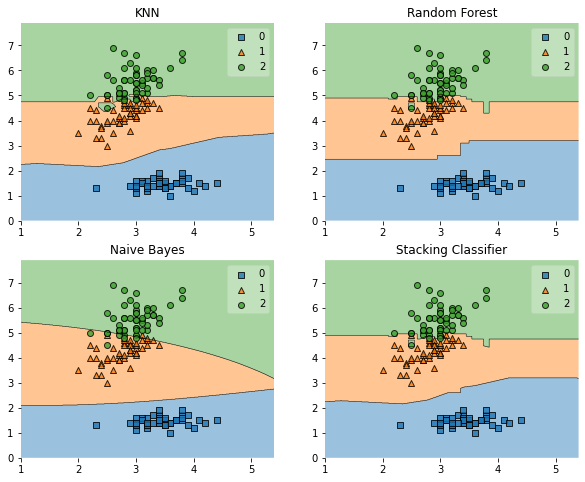

In [78]:
fig = plt.figure(figsize=(10,8))
gs = gridspec.GridSpec(2,2)
grid = itertools.product([0,1],repeat=2)

clf_cv_mean = []
clf_cv_std = []

for clf,label,grd in zip(clf_list,label,grid):
    scores = cross_val_score(clf,X,y,cv=3,scoring='accuracy')
    print('Accuracy: %.2f(+/- %.2f)[%s]'%(scores.mean(),scores.std(),label))
    
    clf.fit(X,y)
    ax = plt.subplot(gs[grd[0],grd[1]])
    fig = plot_decision_regions(X=X,y=y,clf=clf)
    plt.title(label)

plt.show()

In [79]:
import pandas as pd
import numpy as np
import warnings
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

warnings.filterwarnings('ignore')
%matplotlib inline

import itertools
import matplotlib.gridspec as gridspec
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import RandomForestClassifier
# from mlxtend.classifier import StackingClassifier
from sklearn.model_selection import cross_val_score, train_test_split
# from mlxtend.plotting import plot_learning_curves
# from mlxtend.plotting import plot_decision_regions

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split

from sklearn import linear_model
from sklearn import preprocessing
from sklearn.svm import SVR
from sklearn.decomposition import PCA,FastICA,FactorAnalysis,SparsePCA

import lightgbm as lgb
import xgboost as xgb
from sklearn.model_selection import GridSearchCV,cross_val_score
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor

from sklearn.metrics import mean_squared_error, mean_absolute_error

In [80]:
path = 'D:/data analysis/天池-二手车/'
train_data = pd.read_csv(path+'used_car_train_20200313.csv',sep=' ')
test_data = pd.read_csv(path+'used_car_testB_20200421.csv',sep= ' ')

In [81]:
train_data.shape

(150000, 31)

In [82]:
test_data.shape

(50000, 30)

In [83]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 31 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   SaleID             150000 non-null  int64  
 1   name               150000 non-null  int64  
 2   regDate            150000 non-null  int64  
 3   model              149999 non-null  float64
 4   brand              150000 non-null  int64  
 5   bodyType           145494 non-null  float64
 6   fuelType           141320 non-null  float64
 7   gearbox            144019 non-null  float64
 8   power              150000 non-null  int64  
 9   kilometer          150000 non-null  float64
 10  notRepairedDamage  150000 non-null  object 
 11  regionCode         150000 non-null  int64  
 12  seller             150000 non-null  int64  
 13  offerType          150000 non-null  int64  
 14  creatDate          150000 non-null  int64  
 15  price              150000 non-null  int64  
 16  v_

In [84]:
numerical_cols = train_data.select_dtypes(exclude='object').columns
print(numerical_cols)

Index(['SaleID', 'name', 'regDate', 'model', 'brand', 'bodyType', 'fuelType',
       'gearbox', 'power', 'kilometer', 'regionCode', 'seller', 'offerType',
       'creatDate', 'price', 'v_0', 'v_1', 'v_2', 'v_3', 'v_4', 'v_5', 'v_6',
       'v_7', 'v_8', 'v_9', 'v_10', 'v_11', 'v_12', 'v_13', 'v_14'],
      dtype='object')


In [85]:
feature_cols = [col for col in numerical_cols if col not in ['SaleID','name','regDate','price']]

In [86]:
X_data = train_data[feature_cols]
y_data = train_data['price']

X_test = test_data[feature_cols]

In [87]:
def Sta_inf(data):
    print('min',np.min(data))
    print('max',np.max(data))
    print('mean',np.mean(data))
    print('ptp',np.ptp(data))
    print('std',np.std(data))
    print('var',np.var(data))

In [88]:
print('sta of label:')
Sta_inf(y_data)

sta of label:
min 11
max 99999
mean 5923.327333333334
ptp 99988
std 7501.973469876438
var 56279605.94272992


In [89]:
X_data = X_data.fillna(-1)
X_test = X_test.fillna(-1)

In [90]:
def build_model_lr(x_train,y_train):
    reg_model = linear_model.LinearRegression()
    reg_model.fit(x_train,y_train)
    return reg_model

def build_model_ridge(x_train,y_train):
    reg_model = linear_model.Ridge(alpha=0.8)#alphas=range(1,100,5)
    reg_model.fit(x_train,y_train)
    return reg_model

def build_model_lasso(x_train,y_train):
    reg_model = linear_model.LassoCV()
    reg_model.fit(x_train,y_train)
    return reg_model

def build_model_gbdt(x_train,y_train):
    estimator =GradientBoostingRegressor(loss='ls',subsample= 0.85,max_depth= 5,n_estimators = 100)
    param_grid = { 
            'learning_rate': [0.05,0.08,0.1,0.2],
            }
    gbdt = GridSearchCV(estimator, param_grid,cv=3)
    gbdt.fit(x_train,y_train)
    print(gbdt.best_params_)
    # print(gbdt.best_estimator_ )
    return gbdt

def build_model_xgb(x_train,y_train):
    model = xgb.XGBRegressor(n_estimators=120, learning_rate=0.08, gamma=0, subsample=0.8,\
        colsample_bytree=0.9, max_depth=5) #, objective ='reg:squarederror'
    model.fit(x_train, y_train)
    return model

def build_model_lgb(x_train,y_train):
    estimator = lgb.LGBMRegressor(num_leaves=63,n_estimators = 100)
    param_grid = {
        'learning_rate': [0.01, 0.05, 0.1],
    }
    gbm = GridSearchCV(estimator, param_grid)
    gbm.fit(x_train, y_train)
    return gbm


In [99]:
xgr = xgb.XGBRegressor(n_estimators=120,learning_rate=0.1,subsample=0.8,colsample_bytree=0.9,max_depth=7)

scores_train = []
scores = []

sk = StratifiedKFold(n_splits=5,shuffle=True,random_state=0)
for train_ind,val_ind in sk.split(X_data,y_data):
    train_X = X_data.iloc[train_ind].values
    train_y = y_data.iloc[train_ind]
    val_X = X_data.iloc[val_ind].values
    val_y = y_data.iloc[val_ind]
    
    xgr.fit(train_X,train_y)
    pred_train_xgb = xgr.predict(train_X)
    pred_xgb = xgr.predict(val_X)
    
    score_train = mean_absolute_error(train_y,pred_train_xgb)
    scores_train.append(score_train)
    score = mean_absolute_error(val_y,pred_xgb)
    scores.append(score)
    
print('train mae:',np.mean(score_train))
print('val mae:',np.mean(scores))

train mae: 594.8909339177708
val mae: 693.3820681626748


In [100]:
X_train,X_val,y_train,y_val = train_test_split(X_data,y_data,test_size=0.3)

In [105]:
print('Predict LR...')
model_lr = build_model_lr(X_train,y_train)
val_lr = model_lr.predict(X_val)
sub_lr = model_lr.predict(X_test)

print('Predict Ridge...')
model_ridge = build_model_ridge(X_train,y_train)
val_ridge = model_ridge.predict(X_val)
sub_ridge = model_ridge.predict(X_test)

print('Predict Lasso...')
model_lasso = build_model_lasso(X_train,y_train)
val_lasso = model_lasso.predict(X_val)
sub_lasso = model_lasso.predict(X_test)

print('Predict GBDT...')
model_gbdt = build_model_gbdt(X_train,y_train)
val_gbdt = model_gbdt.predict(X_val)
sub_gbdt = model_gbdt.predict(X_test)

print('predict XGB...')
model_xgb = build_model_xgb(X_train,y_train)
val_xgb = model_xgb.predict(X_val)
sub_xgb = model_xgb.predict(X_test)

print('predict lgb...')
model_lgb = build_model_lgb(X_train,y_train)
val_lgb = model_lgb.predict(X_val)
sub_lgb = model_lgb.predict(X_test)


Predict LR...
Predict Ridge...
Predict Lasso...
Predict GBDT...
{'learning_rate': 0.2}
predict XGB...
predict lgb...


In [106]:
mean_absolute_error(y_val,val_lr)

2614.170997126622

In [109]:
mean_absolute_error(y_val,val_lgb)

719.1259197149124

In [110]:
def Weighted_method(test_pre1,test_pre2,test_pre3,w=[1/3,1/3,1/3]):
    Weighted_result = w[0]*pd.Series(test_pre1)+w[1]*pd.Series(test_pre2)+w[2]*pd.Series(test_pre3)
    return Weighted_result

w = [0.3,0.4,0.3]

val_pre = Weighted_method(val_lgb,val_xgb,val_gbdt,w)
MAE_Weighted = mean_absolute_error(y_val,val_pre)
print('MAE of Weighted of val:',MAE_Weighted)

MAE of Weighted of val: 736.9301147270761


In [112]:
train_lgb_pred = model_lgb.predict(X_train)
train_xgb_pred = model_xgb.predict(X_train)
train_gbdt_pred = model_gbdt.predict(X_train)

val_lgb_pred = model_lgb.predict(X_val)
val_xgb_pred = model_xgb.predict(X_val)
val_gbdt_pred = model_gbdt.predict(X_val)

sub_lgb_pred = model_lgb.predict(X_test)
sub_xgb_pred = model_xgb.predict(X_test)
sub_gbdt_pred = model_gbdt.predict(X_test)

stack_X_train = pd.DataFrame()
stack_X_train['Method_1'] = train_lgb_pred
stack_X_train['Method_2'] = train_xgb_pred
stack_X_train['Method_3'] = train_gbdt_pred

stack_X_val = pd.DataFrame()
stack_X_val['Method_1'] = val_lgb_pred
stack_X_val['Method_2'] = val_xgb_pred
stack_X_val['Method_3'] = val_gbdt_pred

stack_X_test = pd.DataFrame()
stack_X_test['Method_1'] = sub_lgb_pred
stack_X_test['Method_2'] = sub_xgb_pred
stack_X_test['Method_3'] = sub_gbdt_pred

In [113]:
stack_X_test.head()

,Method_1,Method_2,Method_3
0,1249.873077,1223.781128,1155.058682
1,1817.406038,1754.193237,2023.309299
2,8273.537077,8166.165039,8153.630760
3,1182.317832,1113.444336,1120.038113
4,2041.030368,1953.917114,2052.359787


In [116]:
model_lr_Stacking = build_model_lr(stack_X_train,y_train)

train_pre_Stacking = model_lr_Stacking.predict(stack_X_train)
print('MAE of Stacking-LR:',mean_absolute_error(y_train,train_pre_Stacking))

val_pre_Stacking = model_lr_Stacking.predict(stack_X_val)
print('MAE of Stacking-LR:',mean_absolute_error(y_val,val_pre_Stacking))

MAE of Stacking-LR: 626.1657057303363
MAE of Stacking-LR: 726.8039355678044


In [117]:
Sta_inf(val_pre_Stacking)

min -591.3056418186504
max 89461.50949892402
mean 5923.589677384016
ptp 90052.81514074266
std 7451.983572155749
var 55532059.15967916


In [118]:
Sta_inf(train_pre_Stacking)

min -1677.5731126574253
max 96808.09770629421
mean 5922.651876190475
ptp 98485.67081895164
std 7378.08141006806
var 54436085.29359189


In [125]:
train_pre_Stacking[train_pre_Stacking<10] =10

In [127]:
mean_absolute_error(y_train,train_pre_Stacking)

625.9713316232312

In [129]:
val_pre_Stacking[val_pre_Stacking<10] = 10

In [130]:
mean_absolute_error(y_val,val_pre_Stacking)

726.6491755623904